<a href="https://colab.research.google.com/github/baumannf/bina_module/blob/main/BINA_LN1_CybercrimeVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datenanalyse & Visualisierung der Cyberkriminalität im DACH - Raum mit Fokus Sensibilisierung der schweizer Bevölkerung

In diesem Jupyter Notebook werden die zuvor aufbereiteten Datensätze ausgewertet und entsprechend visualisiert. Es wurde sich für zwei Jupyter Notebook entschieden, um besser mit den aufbereitetend Daten arbeiten zu können.

## Import der Daten

In diesem Schritt werden die 'aufbereiteten' csv-Files aus dem Jupyter Notebook 'BINA_LN1_CybercrimeAnalytics.ipynb' importiert. Diese Datenquellen werden dann ausgewertet, analysiert und entsprechend visualisiert.

### Import Masterdaten 'Cyberdelikte - DACH'

In diesem Abschnitt werden die folgenden Masterfiles für die weitere Verwendung im Rahmen der Projektarbeit importiert aus dem [GitHub Repository](https://github.com/baumannf/bina_module):

- 'Cyberdelikt - DACH'
- 'Cyberdelikte - DCH - Täter'
- 'Cyberdelikte - DCH - Opfer'
- 'Sicherheit Internet - CH'

In [78]:
# Define variables for the master file paths
data_cyber_dach = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data_cyber_dch_taeter = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DCH_Taeter.csv'
data_cyber_ch_opfer = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_CH_Opfer.csv'
data_internetsec_ch = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Sicherheit-Internet_CH.csv'

In [79]:
import pandas as pd

# Data import cybercrime dach
master_cyber_dach = pd.read_csv(data_cyber_dach, sep=',')
master_cyber_dach.head()

,land,jahr,cyber_kat,taten,aufg_taten,aufg_quote
0,ch,2020,Computerbetrug,18171,7104,39.095262
1,ch,2020,Computersabotage,1072,158,14.738806
2,ch,2020,Datendiebstahl,1447,209,14.443677
3,ch,2020,Datenfälschung/-täuschung,1240,913,73.629032
4,ch,2021,Computerbetrug,22962,7689,33.485759


In [80]:
# Data import cybercrime dch offender
master_cyber_dch_taeter = pd.read_csv(data_cyber_dch_taeter, sep=',')
master_cyber_dch_taeter.head()

,land,jahr,cyber_kat,<10,10-17,18-24,25-29,30-39,40-49,50-59,>60,mann,frau
0,ch,2020,Computerbetrug,0.0,120.0,563.0,354.0,594.0,480.0,325.0,222.0,1769.0,929.0
1,ch,2020,Computersabotage,0.0,6.0,17.0,15.0,27.0,19.0,15.0,8.0,81.0,26.0
2,ch,2020,Datendiebstahl,0.0,29.0,34.0,15.0,31.0,28.0,10.0,6.0,124.0,32.0
3,ch,2020,Datenfälschung/-täuschung,0.0,134.0,70.0,76.0,152.0,133.0,81.0,58.0,468.0,239.0
4,ch,2021,Computerbetrug,0.0,204.0,586.0,404.0,746.0,496.0,417.0,315.0,2137.0,1056.0


In [81]:
# Data import cybercrime ch victims
master_cyber_ch_opfer = pd.read_csv(data_cyber_ch_opfer, sep=',')
master_cyber_ch_opfer.head()

,jahr,delikt,taten,aufg_taten,15-29,30-59,>60,mann,frau
0,2020,Phishing,642,60,64.0,238.0,93.0,218.0,179.0
1,2020,Hacking: Gewaltsames Eindringen in ein Datenve...,319,46,35.0,71.0,27.0,61.0,73.0
2,2020,Hacking: Eindringen in ein Datenverarbeitungss...,470,101,75.0,132.0,34.0,125.0,119.0
3,2020,Malware – Ransomware,222,4,1.0,11.0,7.0,17.0,2.0
4,2020,Malware – E-Banking Trojaner,83,19,6.0,19.0,19.0,27.0,17.0


In [82]:
# Data import internet security ch
master_internetsec_ch = pd.read_csv(data_internetsec_ch, sep=',')
master_internetsec_ch.head()

,kategorie,alter,bildung,sex,2023,2021,2019
0,Verwendung von Sicherheitssoftware (Computer),15-29,sekundarstufe_2,M,59572.0,76047.0,62168.0
1,Verwendung von Sicherheitssoftware (Computer),15-29,tertiaerstufe,M,92802.0,78683.0,72913.0
2,Verwendung von Sicherheitssoftware (Computer),15-29,oblig_schulbild_<25,M,230380.0,276876.0,290256.0
3,Verwendung von Sicherheitssoftware (Computer),30-59,ohne_nachoblig_schulbild_>25,M,65591.0,92791.0,146203.0
4,Verwendung von Sicherheitssoftware (Computer),30-59,sekundarstufe_2,M,343394.0,345599.0,447555.0


### Index setzen Data Frames
Aufgrund des Importes der Master Files müssen die Zusammengesetzten Indexe der Files wiederhergestellt resp. neu gesetzt werden.

In [83]:
# Reset the index of the dataframe 'master_cyber_dach'
master_cyber_dach = master_cyber_dach.reset_index()
master_cyber_dach = master_cyber_dach.set_index(['land','jahr','cyber_kat'])
master_cyber_dach = master_cyber_dach.drop(columns=['index'])
master_cyber_dach

taten  aufg_taten  aufg_quote
land jahr cyber_kat                                                
ch   2020 Computerbetrug              18171        7104   39.095262
          Computersabotage             1072         158   14.738806
          Datendiebstahl               1447         209   14.443677
          Datenfälschung/-täuschung    1240         913   73.629032
     2021 Computerbetrug              22962        7689   33.485759
          Computersabotage             1362         112    8.223201
          Datendiebstahl               2540         261   10.275591
          Datenfälschung/-täuschung    1103         719   65.185857
     2022 Computerbetrug              24407        7952   32.580817
          Computersabotage             1382         141   10.202605
          Datendiebstahl               3974         245    6.165073
          Datenfälschung/-täuschung     847         533   62.927981
     2023 Computerbetrug              33585        7089   21.107637
          Computersabotage             1372          94    6.851312
          Datendiebstahl               5680         290    5.105634
          Datenfälschung/-täuschung     725         430   59.310345
de   2020 Datenfälschung/-täuschung   10895        3827   35.126205
          Computersabotage             3770         891   23.633952
          Datendiebstahl              10763        2639   24.519186
          Computerbetrug             105049       34453   32.797076
     2021 Datenfälschung/-täuschung   13390        4365   32.598954
          Computersabotage             5053         967   19.137146
          Datendiebstahl              14918        2765   18.534656
          Computerbetrug             113002       34842   30.833083
     2022 Datenfälschung/-täuschung   13043        4428   33.949245
          Computersabotage             3451         897   25.992466
          Datendiebstahl              13206        2707   20.498258
          Computerbetrug             107165       31293   29.200765
at   2020 Computerbetrug              10957        1789   16.327462
          Computersabotage             1248         201   16.105769
          Datendiebstahl                 79          17   21.518987
          Datenfälschung/-täuschung     630         452   71.746032
     2021 Computerbetrug              13241        2228   16.826524
          Computersabotage             1401         241   17.201999
          Datendiebstahl                 72          15   20.833333
          Datenfälschung/-täuschung     770         411   53.376623
     2022 Computerbetrug              18966        3779   19.925129
          Computersabotage             2280         246   10.789474
          Datendiebstahl                 76          26   34.210526
          Datenfälschung/-täuschung    1054         672   63.757116

In [84]:
# Reset the index of the dataframe 'master_cyber_dch_taeter'
master_cyber_dch_taeter = master_cyber_dch_taeter.reset_index()
master_cyber_dch_taeter = master_cyber_dch_taeter.set_index(['land','jahr','cyber_kat'])
master_cyber_dch_taeter

index   <10   10-17   18-24   25-29  \
land jahr cyber_kat                                                        
ch   2020 Computerbetrug                 0   0.0   120.0   563.0   354.0   
          Computersabotage               1   0.0     6.0    17.0    15.0   
          Datendiebstahl                 2   0.0    29.0    34.0    15.0   
          Datenfälschung/-täuschung      3   0.0   134.0    70.0    76.0   
     2021 Computerbetrug                 4   0.0   204.0   586.0   404.0   
          Computersabotage               5   0.0     5.0     7.0     9.0   
          Datendiebstahl                 6   0.0    36.0    32.0    18.0   
          Datenfälschung/-täuschung      7   0.0    66.0    63.0    65.0   
     2022 Computerbetrug                 8   0.0   233.0   672.0   429.0   
          Computersabotage               9   0.0    11.0    20.0    19.0   
          Datendiebstahl                10   0.0    23.0    38.0    23.0   
          Datenfälschung/-täuschung     11   0.0    67.0    43.0    32.0   
     2023 Computerbetrug                12   3.0   229.0   761.0   474.0   
          Computersabotage              13   0.0     9.0     8.0     9.0   
          Datendiebstahl                14   0.0    38.0    72.0    20.0   
          Datenfälschung/-täuschung     15   1.0    59.0    25.0    36.0   
de   2020 Datenfälschung/-täuschung     16   1.0   170.0   611.0   539.0   
          Computersabotage              17   0.0   139.0   201.0   102.0   
          Datendiebstahl                18   1.0   215.0   487.0   375.0   
          Computerbetrug                19   5.0  1153.0  4631.0  3653.0   
     2021 Datenfälschung/-täuschung     20   0.0   201.0   729.0   627.0   
          Computersabotage              21   3.0   125.0   199.0   131.0   
          Datendiebstahl                22   1.0   239.0   588.0   387.0   
          Computerbetrug                23   8.0  1224.0  4643.0  3685.0   
     2022 Datenfälschung/-täuschung     24   1.0   226.0   713.0   524.0   
          Computersabotage              25   3.0   105.0   161.0    79.0   
          Datendiebstahl                26   2.0   178.0   502.0   322.0   
          Computerbetrug                27  10.0  1227.0  4392.0  3153.0   

                                      30-39   40-49   50-59     >60     mann  \
land jahr cyber_kat                                                            
ch   2020 Computerbetrug              594.0   480.0   325.0   222.0   1769.0   
          Computersabotage             27.0    19.0    15.0     8.0     81.0   
          Datendiebstahl               31.0    28.0    10.0     6.0    124.0   
          Datenfälschung/-täuschung   152.0   133.0    81.0    58.0    468.0   
     2021 Computerbetrug              746.0   496.0   417.0   315.0   2137.0   
          Computersabotage             24.0    15.0    13.0     5.0     55.0   
          Datendiebstahl               24.0    26.0    22.0     5.0    133.0   
          Datenfälschung/-täuschung   118.0   113.0    87.0    57.0    370.0   
     2022 Computerbetrug              735.0   535.0   441.0   350.0   2257.0   
          Computersabotage             13.0    15.0    14.0     4.0     79.0   
          Datendiebstahl               37.0    14.0    16.0     7.0    124.0   
          Datenfälschung/-täuschung    94.0    76.0    56.0    31.0    256.0   
     2023 Computerbetrug              839.0   604.0   480.0   397.0   2490.0   
          Computersabotage             31.0    13.0    10.0     4.0     62.0   
          Datendiebstahl               47.0    22.0    14.0     4.0    180.0   
          Datenfälschung/-täuschung    88.0    62.0    47.0    37.0    227.0   
de   2020 Datenfälschung/-täuschung   855.0   589.0   416.0   173.0   2470.0   
          Computersabotage            225.0   141.0    87.0    29.0    708.0   
          Datendiebstahl              683.0   406.0   260.0    95.0   1804.0   
          Computerbetrug             6270.0  3520.0  2229.0  1069.0  15189.0

In [85]:
# Reset the index of the dataframe 'master_cyber_dch_taeter'
master_cyber_ch_opfer = master_cyber_ch_opfer.reset_index()
master_cyber_ch_opfer = master_cyber_ch_opfer.set_index(['jahr','delikt'])
master_cyber_ch_opfer = master_cyber_ch_opfer.drop(columns=['index'])
master_cyber_ch_opfer

taten  aufg_taten  \
jahr delikt                                                                  
2020 Phishing                                              642          60   
     Hacking: Gewaltsames Eindringen in ein Datenver...    319          46   
     Hacking: Eindringen in ein Datenverarbeitungssy...    470         101   
     Malware – Ransomware                                  222           4   
     Malware – E-Banking Trojaner                           83          19   
...                                                        ...         ...   
2023 Sextortion                                            108          50   
     Live Streaming                                         26          26   
     Cybersquatting                                         53           1   
     Cyber-Rufschädigung                                    58          36   
     Cyberbullying/-mobbing                                614         393   

                                                         15-29  30-59   >60  \
jahr delikt                                                                   
2020 Phishing                                             64.0  238.0  93.0   
     Hacking: Gewaltsames Eindringen in ein Datenver...   35.0   71.0  27.0   
     Hacking: Eindringen in ein Datenverarbeitungssy...   75.0  132.0  34.0   
     Malware – Ransomware                                  1.0   11.0   7.0   
     Malware – E-Banking Trojaner                          6.0   19.0  19.0   
...                                                        ...    ...   ...   
2023 Sextortion                                           51.0    4.0   1.0   
     Live Streaming                                        2.0    0.0   0.0   
     Cybersquatting                                        9.0   22.0  11.0   
     Cyber-Rufschädigung                                   3.0   28.0   2.0   
     Cyberbullying/-mobbing                              139.0  242.0  43.0   

                                                          mann   frau  
jahr delikt                                                            
2020 Phishing                                            218.0  179.0  
     Hacking: Gewaltsames Eindringen in ein Datenver...   61.0   73.0  
     Hacking: Eindringen in ein Datenverarbeitungssy...  125.0  119.0  
     Malware – Ransomware                                 17.0    2.0  
     Malware – E-Banking Trojaner                         27.0   17.0  
...                                                        ...    ...  
2023 Sextortion                                           15.0   62.0  
     Live Streaming                                        8.0    5.0  
     Cybersquatting                                       20.0   22.0  
     Cyber-Rufschädigung                                  19.0   14.0  
     Cyberbullying/-mobbing                              186.0  272.0  

[80 rows x 7 columns]

In [86]:
# Reset the index of the dataframe 'master_internetsec_ch'
master_internetsec_ch = master_internetsec_ch.reset_index()
master_internetsec_ch = master_internetsec_ch.set_index(['kategorie','alter','bildung','sex'])
master_internetsec_ch = master_internetsec_ch.drop(columns='index')
master_internetsec_ch

2023  \
kategorie                                          alter bildung                      sex             
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M     59572.0   
                                                         tertiaerstufe                M     92802.0   
                                                         oblig_schulbild_<25          M    230380.0   
                                                   30-59 ohne_nachoblig_schulbild_>25 M     65591.0   
                                                         sekundarstufe_2              M    343394.0   
...                                                                                             ...   
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F     68476.0   
                                                   30-59 sekundarstufe_3              F     78645.0   
                                                         tertiaerstufe                F    164070.0   
                                                   60>   sekundarstufe_4              F     63848.0   
                                                         tertiaerstufe                F     69007.0   

                                                                                               2021  \
kategorie                                          alter bildung                      sex             
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M     76047.0   
                                                         tertiaerstufe                M     78683.0   
                                                         oblig_schulbild_<25          M    276876.0   
                                                   30-59 ohne_nachoblig_schulbild_>25 M     92791.0   
                                                         sekundarstufe_2              M    345599.0   
...                                                                                             ...   
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F     62267.0   
                                                   30-59 sekundarstufe_3              F     75135.0   
                                                         tertiaerstufe                F    179910.0   
                                                   60>   sekundarstufe_4              F     51652.0   
                                                         tertiaerstufe                F     62325.0   

                                                                                               2019  
kategorie                                          alter bildung                      sex            
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M     62168.0  
                                                         tertiaerstufe                M     72913.0  
                                                         oblig_schulbild_<25          M    290256.0  
                                                   30-59 ohne_nachoblig_schulbild_>25 M    146203.0  
                                                         sekundarstufe_2              M    447555.0  
...                                                                                             ...  
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F         NaN  
                                                   30-59 sekundarstufe_3              F         NaN  
                                                         tertiaerstufe                F         NaN  
                                                   60>   sekundarstufe_4              F         NaN  
                                                         tertiaerstufe                F         NaN  

[234 rows x 3 columns]

In [87]:
#pip install matplotlib

#import numpy as np
#import matplotlip.pyplot as plt




## Visualisierung der Daten

In diesem Abschnitt werden die zuvor aufbereiteten und bereinigten Daten visuell aufbereitet. Dafür werden verschiedene Visualisierungs-Bibliotheken verwendet.



# Grundanalyse

Zu Beachten: Nicht für alle Jahre konnte von den Ländern entsprechendes Datenmaterial eingeholt werden.

<ipython-input-88-02a18ba06973>:21: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



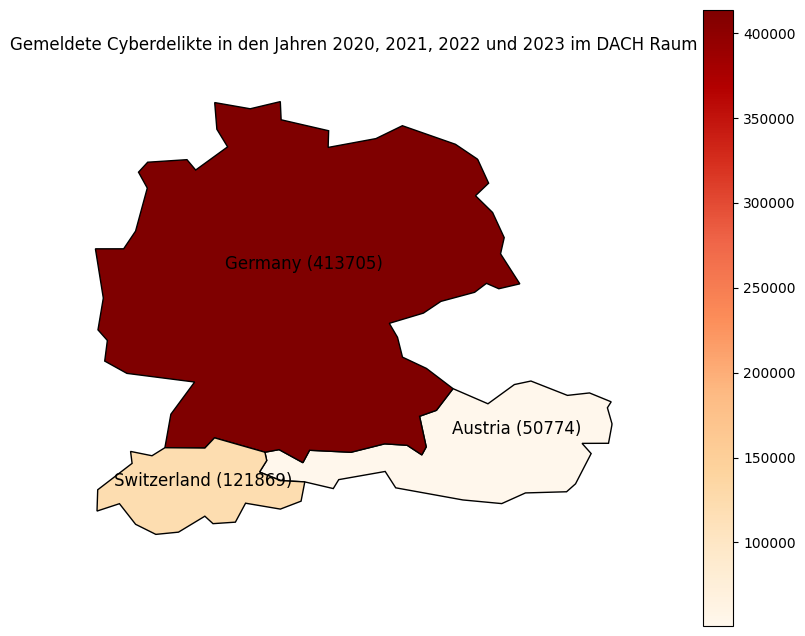

In [88]:
# Zusätzliche Libraries installieren
!pip install geopandas geoplot matplotlib

# Libraries laden
import geopandas as gpd
import pandas as pd
import geoplot
import matplotlib.pyplot as plt

# Daten laden
import io
import requests

url = "https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv"
data = pd.read_csv(url)

# Total Taten aggregieren
total_taten = data.groupby('land')['taten'].sum().reset_index()

# Lowres Karte für die Länder laden
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter für DE, AT und CH
countries_geo = world[world['iso_a3'].isin(['DEU', 'AUT', 'CHE'])]

# Geodaten mit aggregierten Daten verbinden und Mapping ISO Ländercode mit Länderkennzeichnung aus unseren Daten
total_taten['iso_a3'] = total_taten['land'].map({'de': 'DEU', 'at': 'AUT', 'ch': 'CHE'})
merged_data = countries_geo.merge(total_taten, on='iso_a3')

# Choropleth Karte mit Annotationen verwenden
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
choropleth = geoplot.choropleth(
    merged_data,
    hue='taten',
    cmap='OrRd',
    edgecolor='black',
    linewidth=1,
    ax=ax,
    legend=True
)

# Ländernamen und Fälle Total als Labels verwenden
for idx, row in merged_data.iterrows():
    # Representative Punkte für Labels verwenden
    plt.text(
        row['geometry'].representative_point().coords[0][0],
        row['geometry'].representative_point().coords[0][1],
        f"{row['name']} ({row['taten']})",
        fontsize=12,
        ha='center',
        color='black'
    )

ax.set_title('Gemeldete Cyberdelikte in den Jahren 2020, 2021, 2022 und 2023 im DACH Raum')
plt.show()



#### Delikte pro Kopf und 1000 Einwohner Schweiz

|                  | 2020       | 2021         | 2022           | 2023 |
|------------------|------      |------        |------          |------|
| Delikte CH       | 21.930     | 27.967       | 30.610         | 41.362 |
| Bewohner CH      | 8.670.000  | 8.736.000    | 8.807.000      | 8.870.000 |
| Delikte pro Kopf | 0,00253    | 0,00320      | 0,00348        | 0,00466 |
| Delikte pro 1000 Einwohner | 2,53 | 3,20 | 3,48 | 4,66 |



#### Delikte pro Kopf 1000 Einwohner Deutschland

|                  | 2020       | 2021         | 2022           | 2023 |
|------------------|------      |------        |------          |------|
| Delikte DE       | 130.477    | 146.363      | 136.865        | Keine Daten |
| Bewohner DE      | 83.155.031 | 83.237.124   | 84.432.000     | - |
| Delikte pro Kopf | 0,00157    | 0,00176      | 0,00162        | - |
| Delikte pro 1000 Einwohner | 1,57 | 1,76 | 1,62 | - |


#### Delikte pro Kopf 1000 Einwohner Österreich


|                  | 2020       | 2021         | 2022           | 2023 |
|------------------|------      |------        |------          |------|
| Delikte AT       | 12.914     | 15.751       | 22.109         | Keine Daten |
| Bewohner AT      | 8.932.664  | 8.932.664    | 9.027.999      | - |
| Delikte pro Kopf | 0,00145    | 0,00176      | 0,00245        | - |
| Delikte pro 1000 Einwohner | 1,45 | 1,76 | 2,45 | - |




Zu Beginn wird sich der Forschungsfrage "Wie hat sich die Cyberkriminalität in den Jahren 2020 bis 2022 in der DACH-Region entwickelt?" gewidmet.

In [89]:
import pandas as pd
import plotly.express as px

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Animierten Scatterplot erstellen
fig = px.scatter(data, x="cyber_kat", y="taten", animation_frame="jahr",
                 size="taten", color="land", hover_name="cyber_kat",
                 size_max=55, range_y=[data['taten'].min(), data['taten'].max()])

# Legende erstellenm
fig.update_layout(title="Cyberververbrechen nach Kategorie, Land und Jahr",
                  xaxis_title="Kategorie",
                  yaxis_title="Anzahl Fälle",
                  showlegend=True)

# Plot zeigen
fig.show()

Anhand der obigen Visualisierung kann im Allgemeinen gesagt werden, dass die Taten leicht angespiegen sind.

In der Kategorie Computerbetrug ist der Untschied innerhalb der DACH-Region am auffälligsten. Bereits im Jahr 2020 hat Deutschland über 100'000 Fälle verzeichnet. Im Gegensatz dazu haben die Schweiz und Österreich kaum die 20'000 Marke erreichen können. Besorgniserregend ist die Tatsache, dass sich die Zahl an Computerbetrugsfällen in der Schweiz zwischen 2020 und 2023 fast verdoppelt hat.

Computersabotage macht in der gesamten DACH-Region einen minimalen Anteil der Cyberkriminalität aus. In der Analyse wurde überrascht festgestellt, dass auch Datendiebstahl einen kleinen Teil der Taten ausmachen. Anhand dieser Tatsache kann die These aufgestellt werden, dass die Bevölkerung der DACH-Region sehr senibilisiert wurde und achtvoll mit ihren Daten umgehen.

Datenfälschung bzw. Datentäuschung ist ebenfalls eine kleiner Teil an Delikten. Es könnte sich hier bei, um eine Korrelation zu den niegrigen Zahlen im Bereich Datendiebstahl ziehen lassen. Eine effektive Korrelation müsste jedoch zu einem späteren Zeitpunkt seperat untersucht werden.

# Stacked Area Chart pro Land inkl. Kategorie

## CH

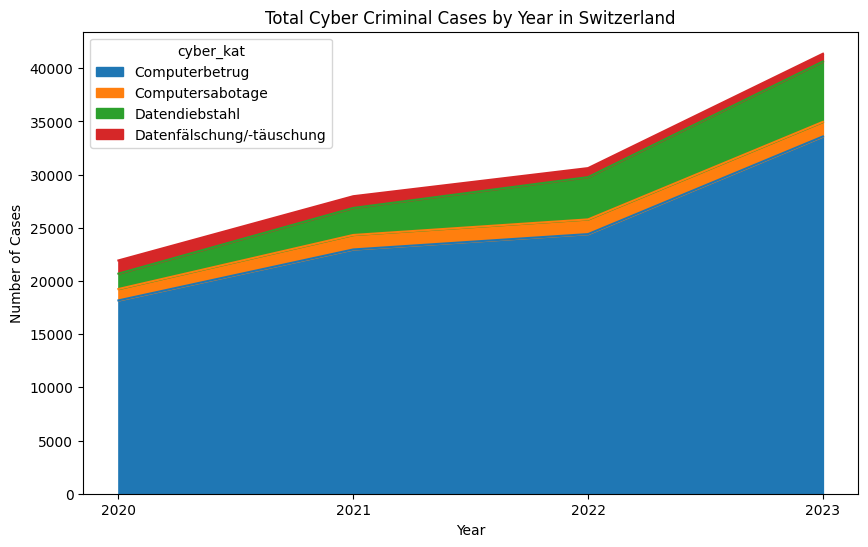

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf ch (Schweiz)
data_ch = data[data['land'] == 'ch']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_ch.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Switzerland')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

## DE

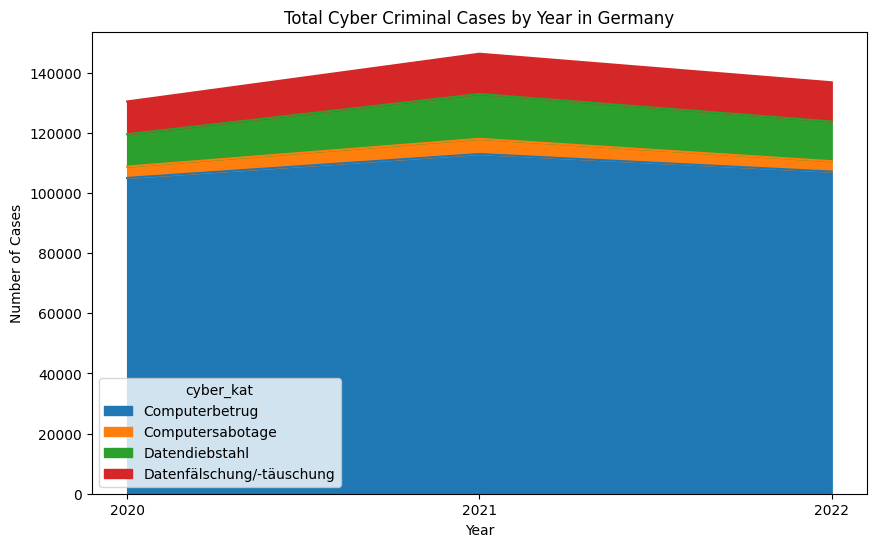

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf de (Deutschland)
data_de = data[data['land'] == 'de']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_de.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Germany')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

## AT

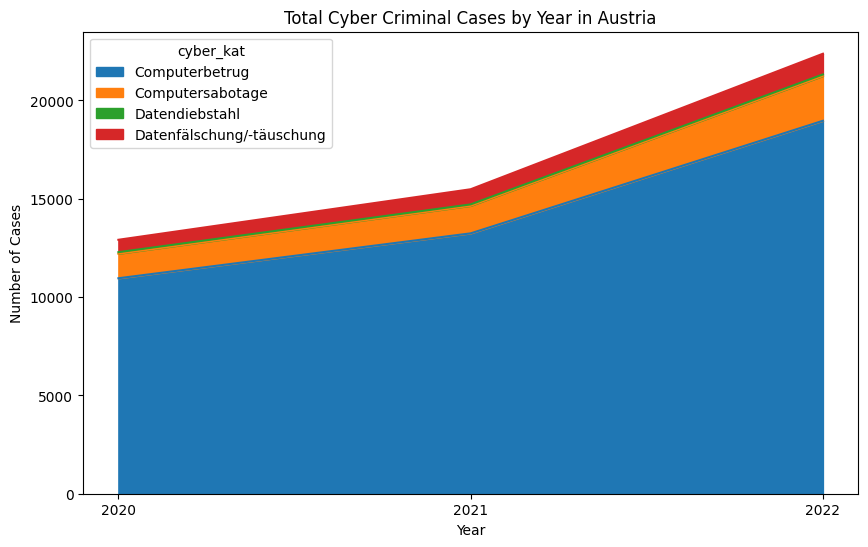

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf at (Österreich)
data_at = data[data['land'] == 'at']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_at.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Austria')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

# Line Chart alle Länder ohne Kategorien

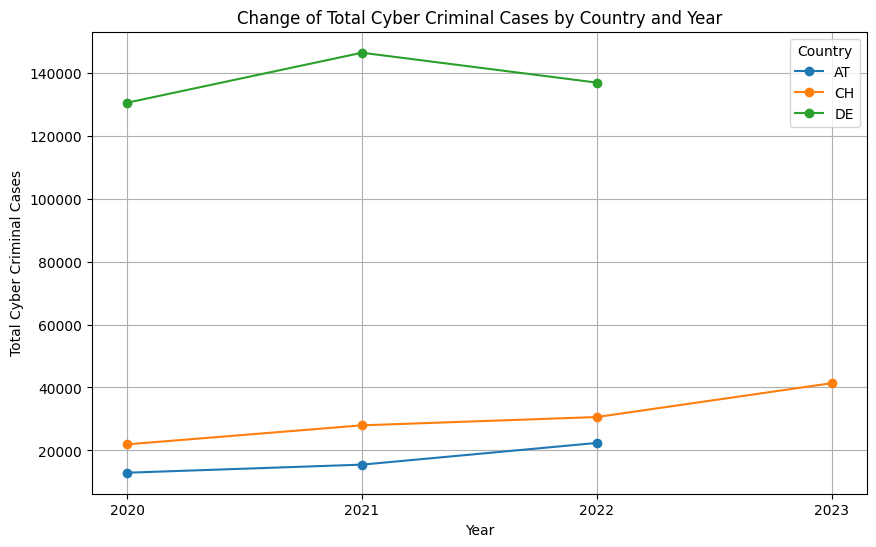

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Daten pro Land und Jahr gruppieren und Fälle summieren
grouped_data = data.groupby(['land', 'jahr'])['taten'].sum().unstack(fill_value=0)

# Line chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
for country in grouped_data.index:
    x_vals = grouped_data.columns
    y_vals = grouped_data.loc[country]
    # Nuller-Jahre ausfiltern für Länder ohne Daten, damit kein Datenpunkt erscheint für Länder ohne Werte
    filtered_x = [x for x, y in zip(x_vals, y_vals) if y > 0]
    filtered_y = [y for y in y_vals if y > 0]
    ax.plot(filtered_x, filtered_y, marker='o', label=f'{country.upper()}')

plt.title('Change of Total Cyber Criminal Cases by Country and Year')
plt.xlabel('Year')
plt.ylabel('Total Cyber Criminal Cases')
plt.xticks(grouped_data.columns)  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Balkendiagramm zum Vergleich der Kategorien pro Land

In [94]:
## Sorry, besser kriege ich es ohne Haarausfall nicht hin :) Gruss Skender

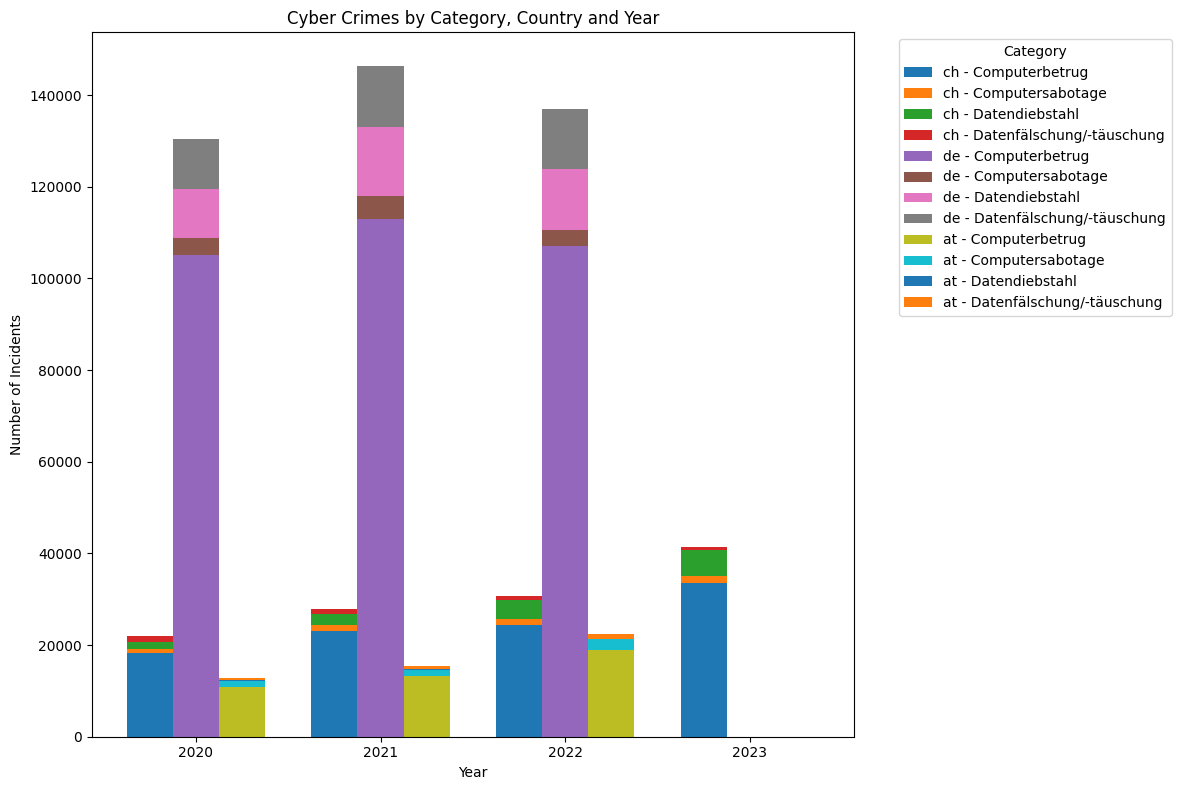

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten aus Github laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)


# Daten pivotieren, um sie für den Plot zu formatieren
pivot_data = data.pivot_table(index=['jahr', 'land'], columns='cyber_kat', values='taten', aggfunc='sum')

# Daten nach Jahr und Land sortieren
pivot_data = pivot_data.reindex(pd.MultiIndex.from_product([pivot_data.index.levels[0], ['ch', 'de', 'at']], names=['jahr', 'land']), fill_value=0)

# Plotten
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.25  # Breite der bars

# Positionen für die gruppierten bars erstellen
positions = np.arange(len(pivot_data.index.levels[0]))  # Jahr Position
country_offsets = np.array([-width, 0, width])  # Länderoffset

# Alle Länder plotten
for offset, country in zip(country_offsets, ['ch', 'de', 'at']):
    ax.bar(positions + offset, pivot_data.xs(country, level='land')['Computerbetrug'], width, label=f'{country} - Computerbetrug')
    ax.bar(positions + offset, pivot_data.xs(country, level='land')['Computersabotage'], width, bottom=pivot_data.xs(country, level='land')['Computerbetrug'], label=f'{country} - Computersabotage')
    ax.bar(positions + offset, pivot_data.xs(country, level='land')['Datendiebstahl'], width, bottom=pivot_data.xs(country, level='land')['Computerbetrug'] + pivot_data.xs(country, level='land')['Computersabotage'], label=f'{country} - Datendiebstahl')
    ax.bar(positions + offset, pivot_data.xs(country, level='land')['Datenfälschung/-täuschung'], width, bottom=pivot_data.xs(country, level='land')['Computerbetrug'] + pivot_data.xs(country, level='land')['Computersabotage'] + pivot_data.xs(country, level='land')['Datendiebstahl'], label=f'{country} - Datenfälschung/-täuschung')

ax.set_title('Cyber Crimes by Category, Country and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_xticks(positions)
ax.set_xticklabels(pivot_data.index.levels[0])
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Vergleich gemeldete Taten und aufgeklärte Taten

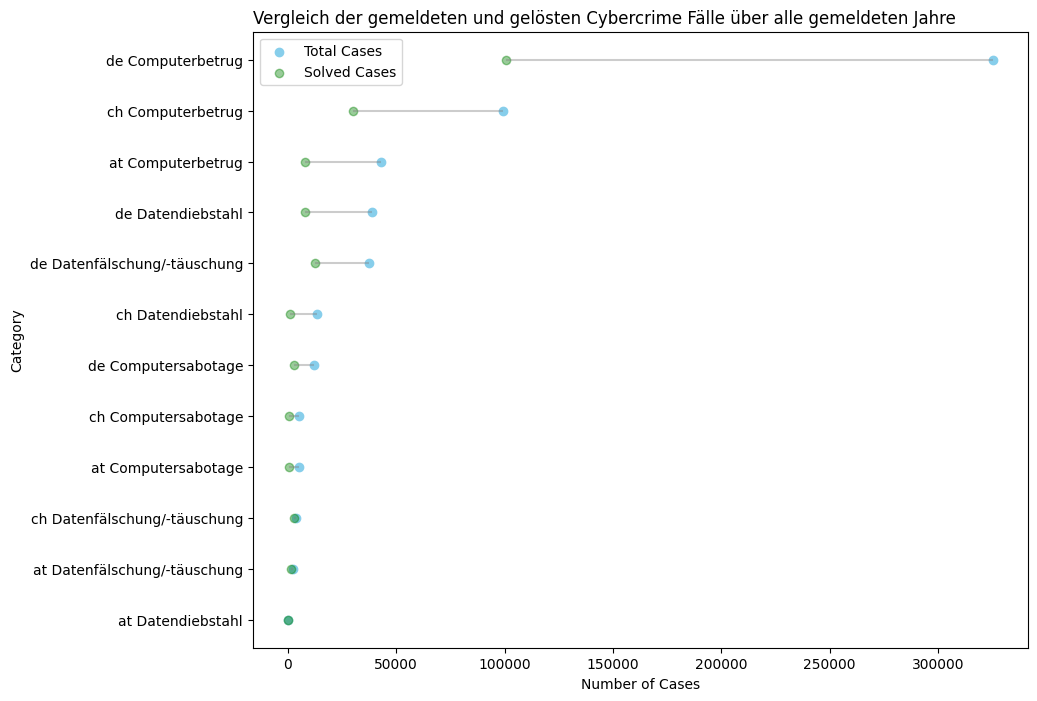

In [96]:
# Libraries importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus CSV laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Daten nach Land und Kategorie gruppieren und Summen aggregieren
grouped_data = data.groupby(['land', 'cyber_kat']).agg({'taten': 'sum', 'aufg_taten': 'sum'}).reset_index()

# Daten nach Anzahl Fällen sortieren für bessere Visibilität
ordered_df = grouped_data.sort_values(by='taten')
my_range = range(1, len(ordered_df.index)+1)

# Lollipop Chart erstellen
plt.figure(figsize=(10, 8))
plt.hlines(y=my_range, xmin=ordered_df['taten'], xmax=ordered_df['aufg_taten'], color='grey', alpha=0.4)
plt.scatter(ordered_df['taten'], my_range, color='skyblue', alpha=1, label='Total Cases')
plt.scatter(ordered_df['aufg_taten'], my_range, color='green', alpha=0.4 , label='Solved Cases')

# Labels und Titel hinzufügen
plt.yticks(my_range, ordered_df.apply(lambda x: f"{x['land']} {x['cyber_kat']}", axis=1))
plt.title("Vergleich der gemeldeten und gelösten Cybercrime Fälle über alle gemeldeten Jahre", loc='left')
plt.xlabel('Number of Cases')
plt.ylabel('Category')

# Legende hinzufügen
plt.legend()

# Plotten
plt.show()

# Fokusanalyse



## Verteilung der Cyberdelikte in der Schweiz und deren Entwicklung
*Einordnung wie die Entwicklung der Delikte verlaufen ist und Merkmale zwischen den vier Jahren in Bezug auf Unterschiede*

Text(0.5, 1.0, 'Anzahl der Delikte der Schweiz aus dem Jahr 2020 gruppiert nach Deliktkategorie')

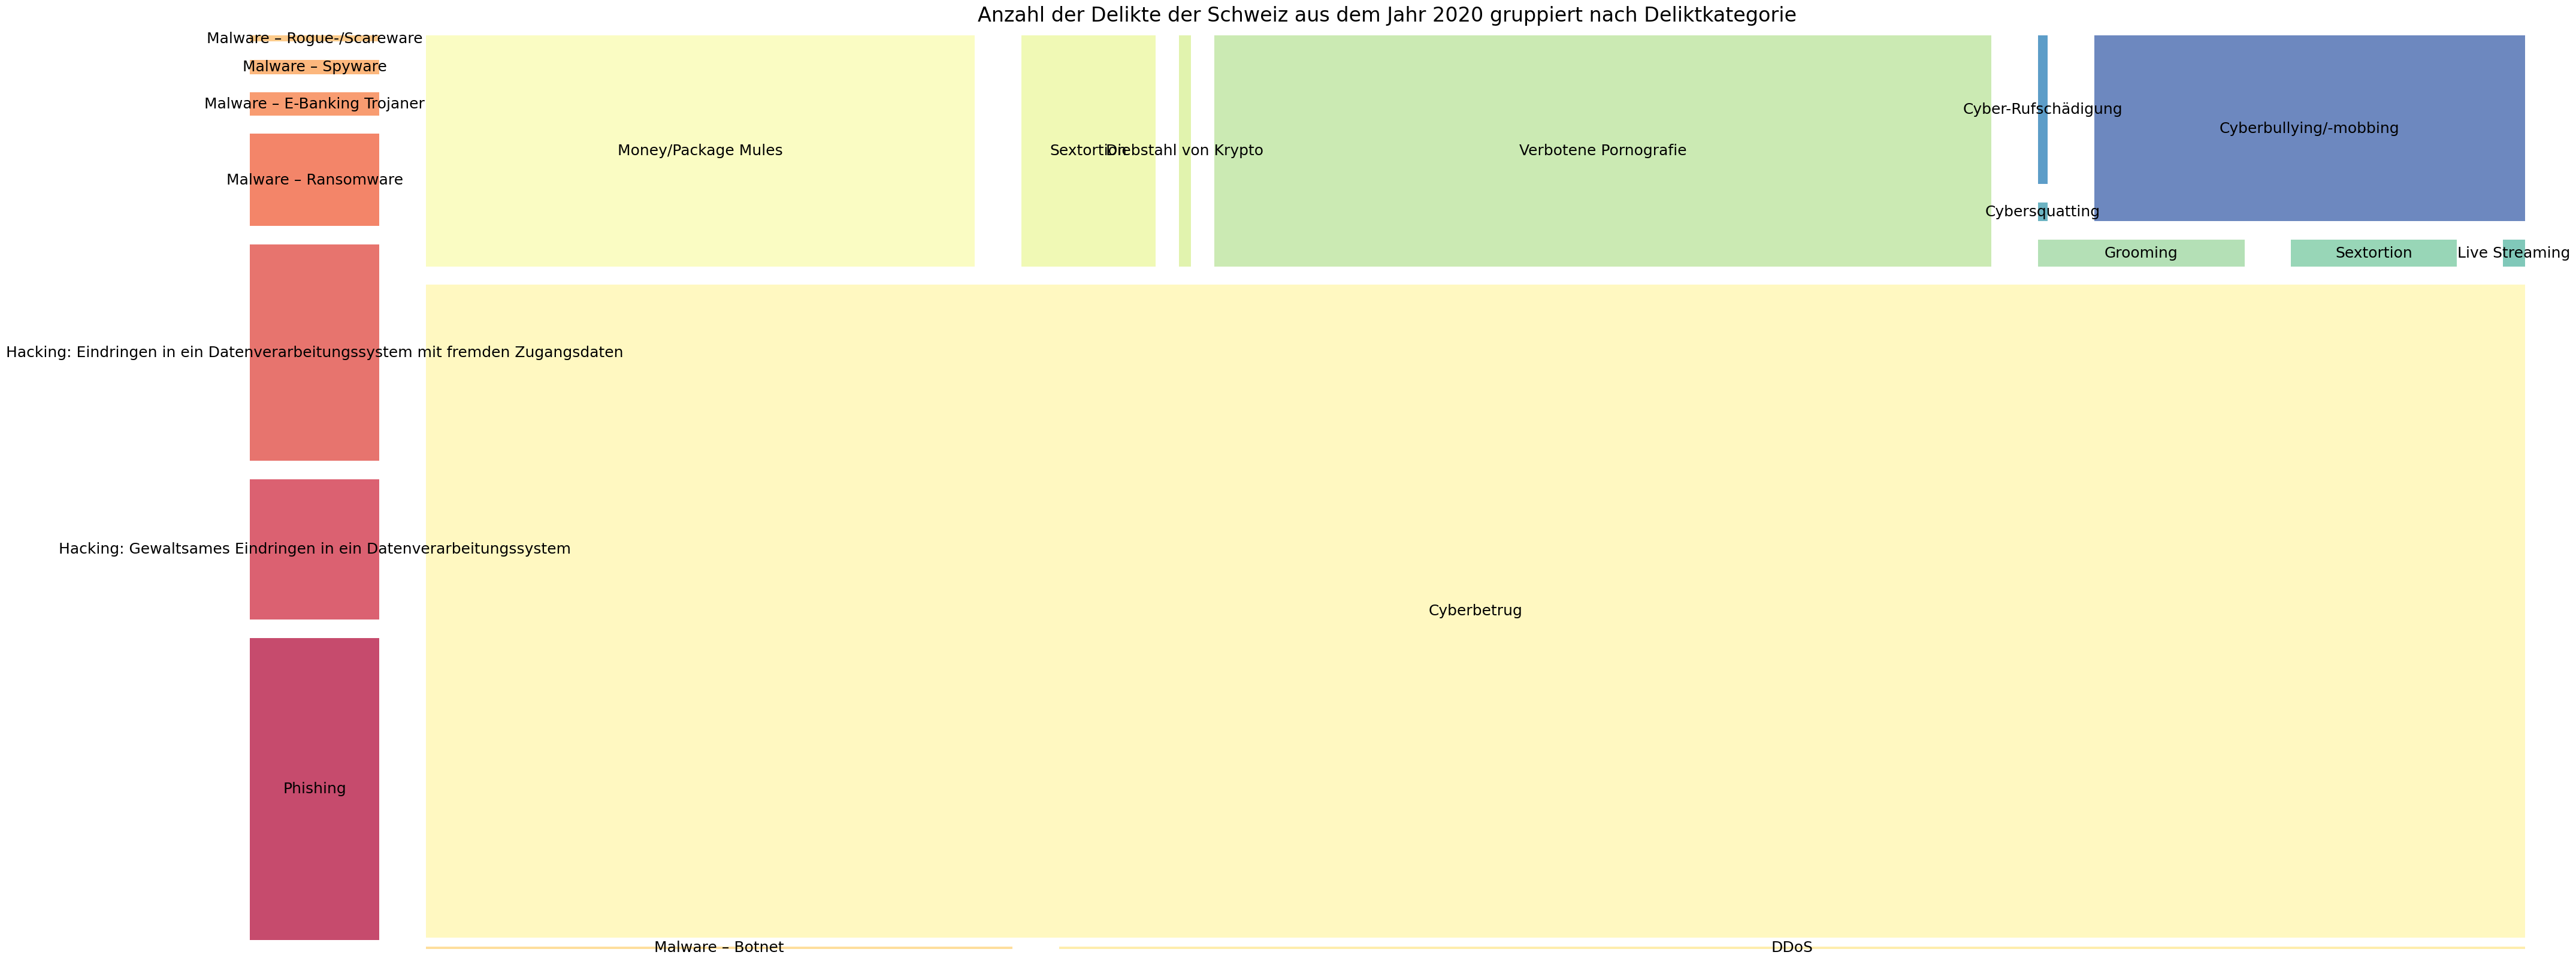

In [97]:
!pip install squarify
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# @title ### Anzahl der Delikte der Schweiz aus dem Jahr 2020 (gruppiert nach Deliktkategorie)

# Erstellung Index Liste mit Deliktkategorien
index_table = master_cyber_ch_opfer.filter(like='2020', axis=0).index
delikt_label = index_table.droplevel(0)

# Erstellung Treemap Plot zu den Daten aus dem Jahre 2020
plt.figure(figsize=(50, 20))
axis = squarify.plot(sizes=master_cyber_ch_opfer.filter(like='2020', axis=0)['taten'], label=delikt_label, alpha=.8, pad = 1, text_kwargs={'fontsize': 18}, color=sns.color_palette('Spectral',n_colors=len(delikt_label)))
plt.axis('off')
axis.set_title("Anzahl der Delikte der Schweiz aus dem Jahr 2020 gruppiert nach Deliktkategorie", fontsize=24)

#### Anzahl der Delikte in der Schweiz aus dem Jahr 2020

Die Grafik zeigt zum einen auf, welche Arten von Delikten im Jahr 2020 in der Schweiz registriert wurden. Zum anderen zeigt die Grösse der Rechtecke, wie gross der Anteil einer Deliktkategorie im Verhältnis zu allen Delikten war. Gut zu sehen ist, dass die Kategorie "Cyberbetrug" den grössten Teil aller Delikte ausmacht. Aus welchen Subkategorien sich die Kategorie Cyberbetrug zusammensetzt ist aus der Datenquelle nicht zu entnehmen. Die zweitgrösste Deliktkategorie ist diejenige der "verbotenen Pornografie".  



Text(0.5, 1.0, 'Anzahl der Delikte der Schweiz aus dem Jahr 2021 gruppiert nach Deliktkategorie')

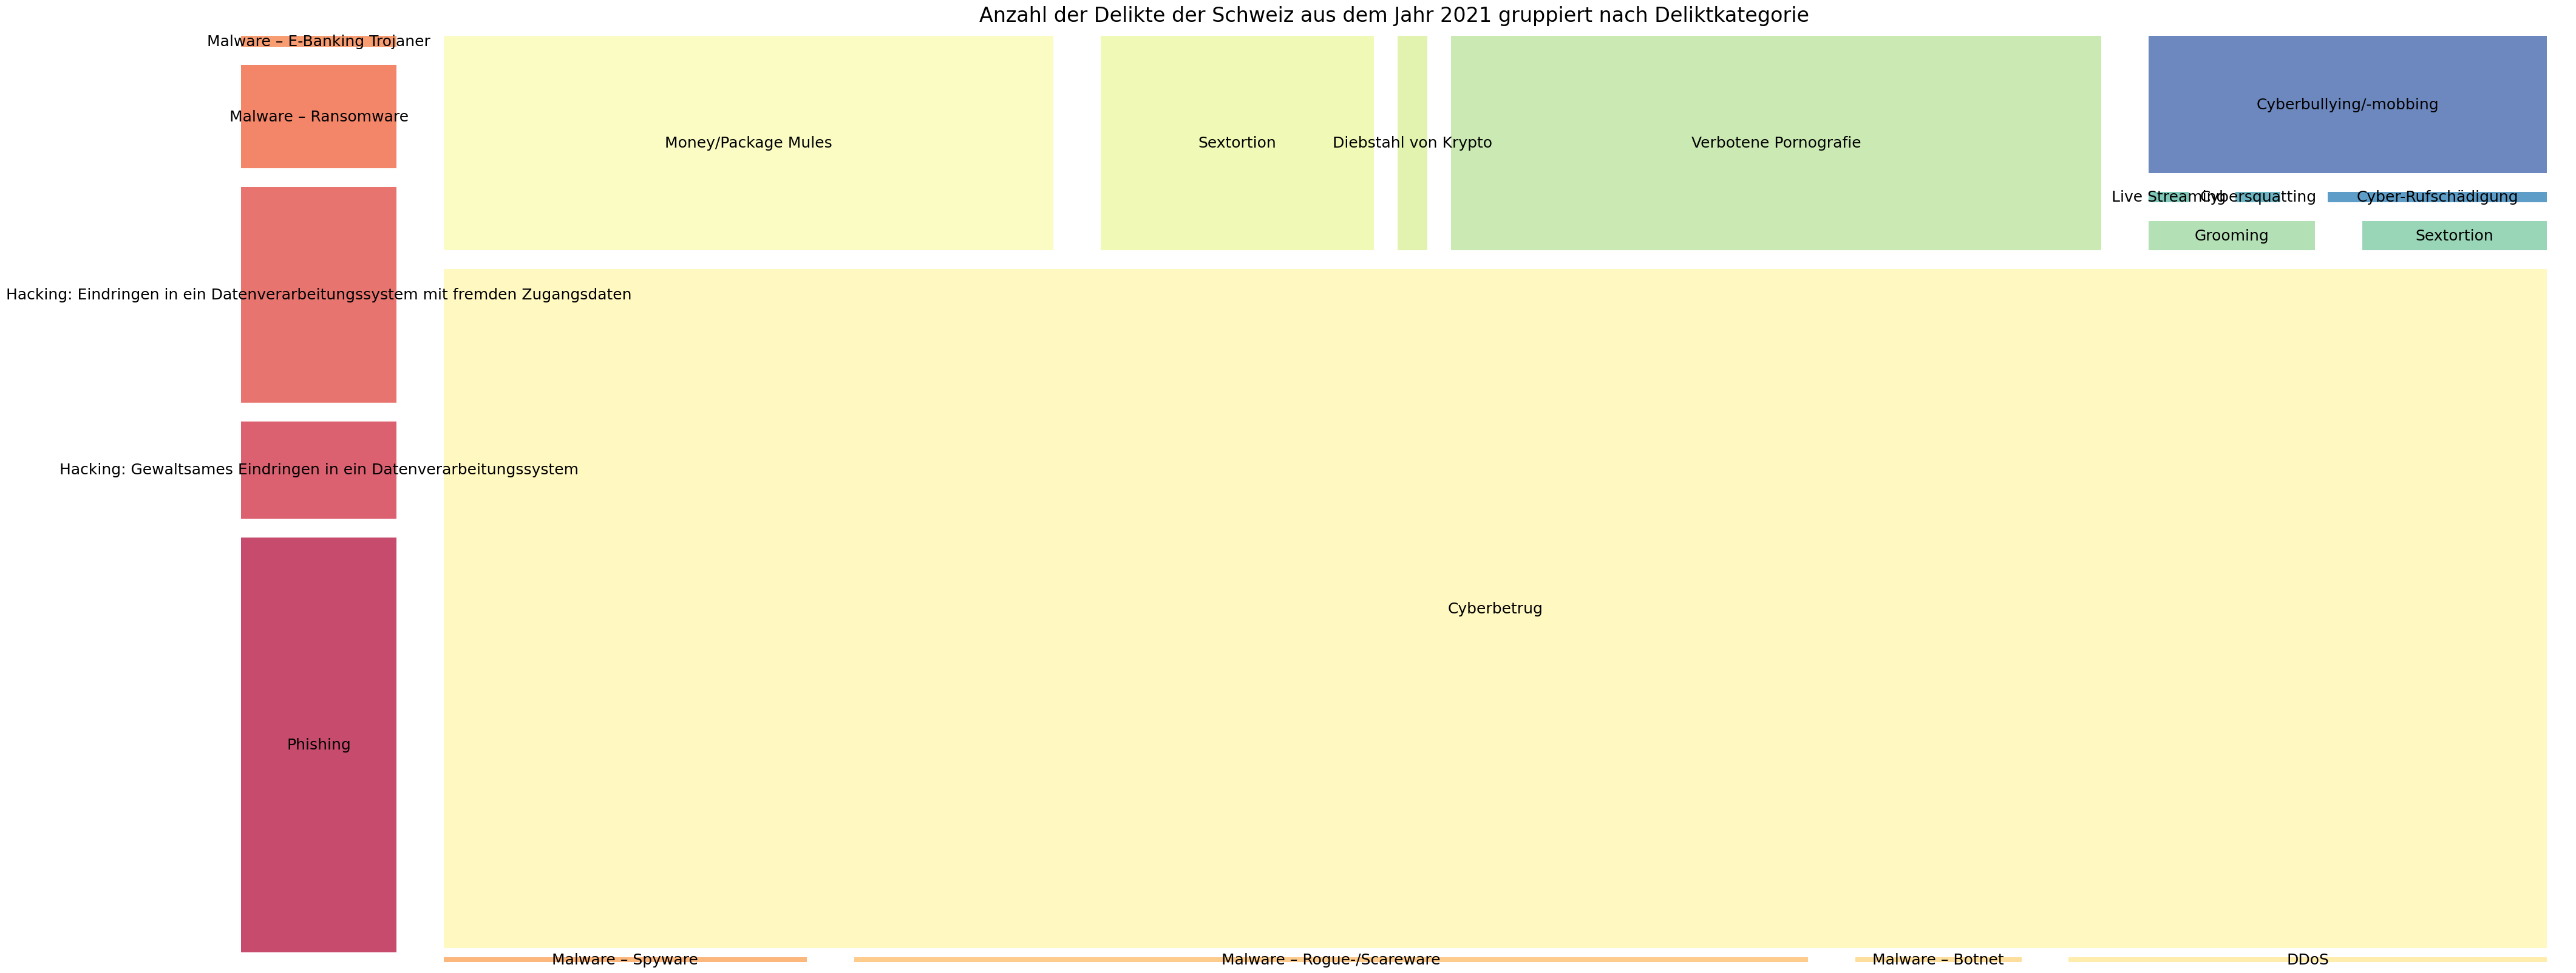

In [98]:
# Erstellung Treemap Plot zu den Daten aus dem Jahre 2021
# @title ### Anzahl der Delikte der Schweiz aus dem Jahr 2021 (gruppiert nach Deliktkategorie)
plt.figure(figsize=(50, 20))
axis = squarify.plot(sizes=master_cyber_ch_opfer.filter(like='2021', axis=0)['taten'], label=delikt_label, alpha=.8, pad = 1, text_kwargs={'fontsize': 18}, color=sns.color_palette('Spectral',n_colors=len(delikt_label)))
plt.axis('off')
axis.set_title("Anzahl der Delikte der Schweiz aus dem Jahr 2021 gruppiert nach Deliktkategorie", fontsize=24)

#### Anzahl der Delikte in der Schweiz aus dem Jahr 2021





Die Grafik zeigt zum einen auf, welche Arten von Delikten im Jahr 2021 in der Schweiz registriert wurden. Zum anderen zeigt die Grösse der Rechtecke, wie gross der Anteil einer Deliktkategorie im Verhaältnis zu allen Delikten war. Unverändert gegenüber dem Jahr 2020 verzeichnet auch im Jahr 2021 die Kategorie "Cyberbetrug" die meisten Delikte. Unverändert bleibt auch die zweitgrösste Deliktkategorie.  

Zu vernehmen ist, dass die Kategorie "Phishing" gegenüber 2020 etwas zugenommen hat. Dies obwohl die Anstrengungen zur Sensibilisierung der Öffentlichkeit für solche Delikte zugenommen hat.  

Text(0.5, 1.0, 'Anzahl der Delikte der Schweiz aus dem Jahr 2022 gruppiert nach Deliktkategorie')

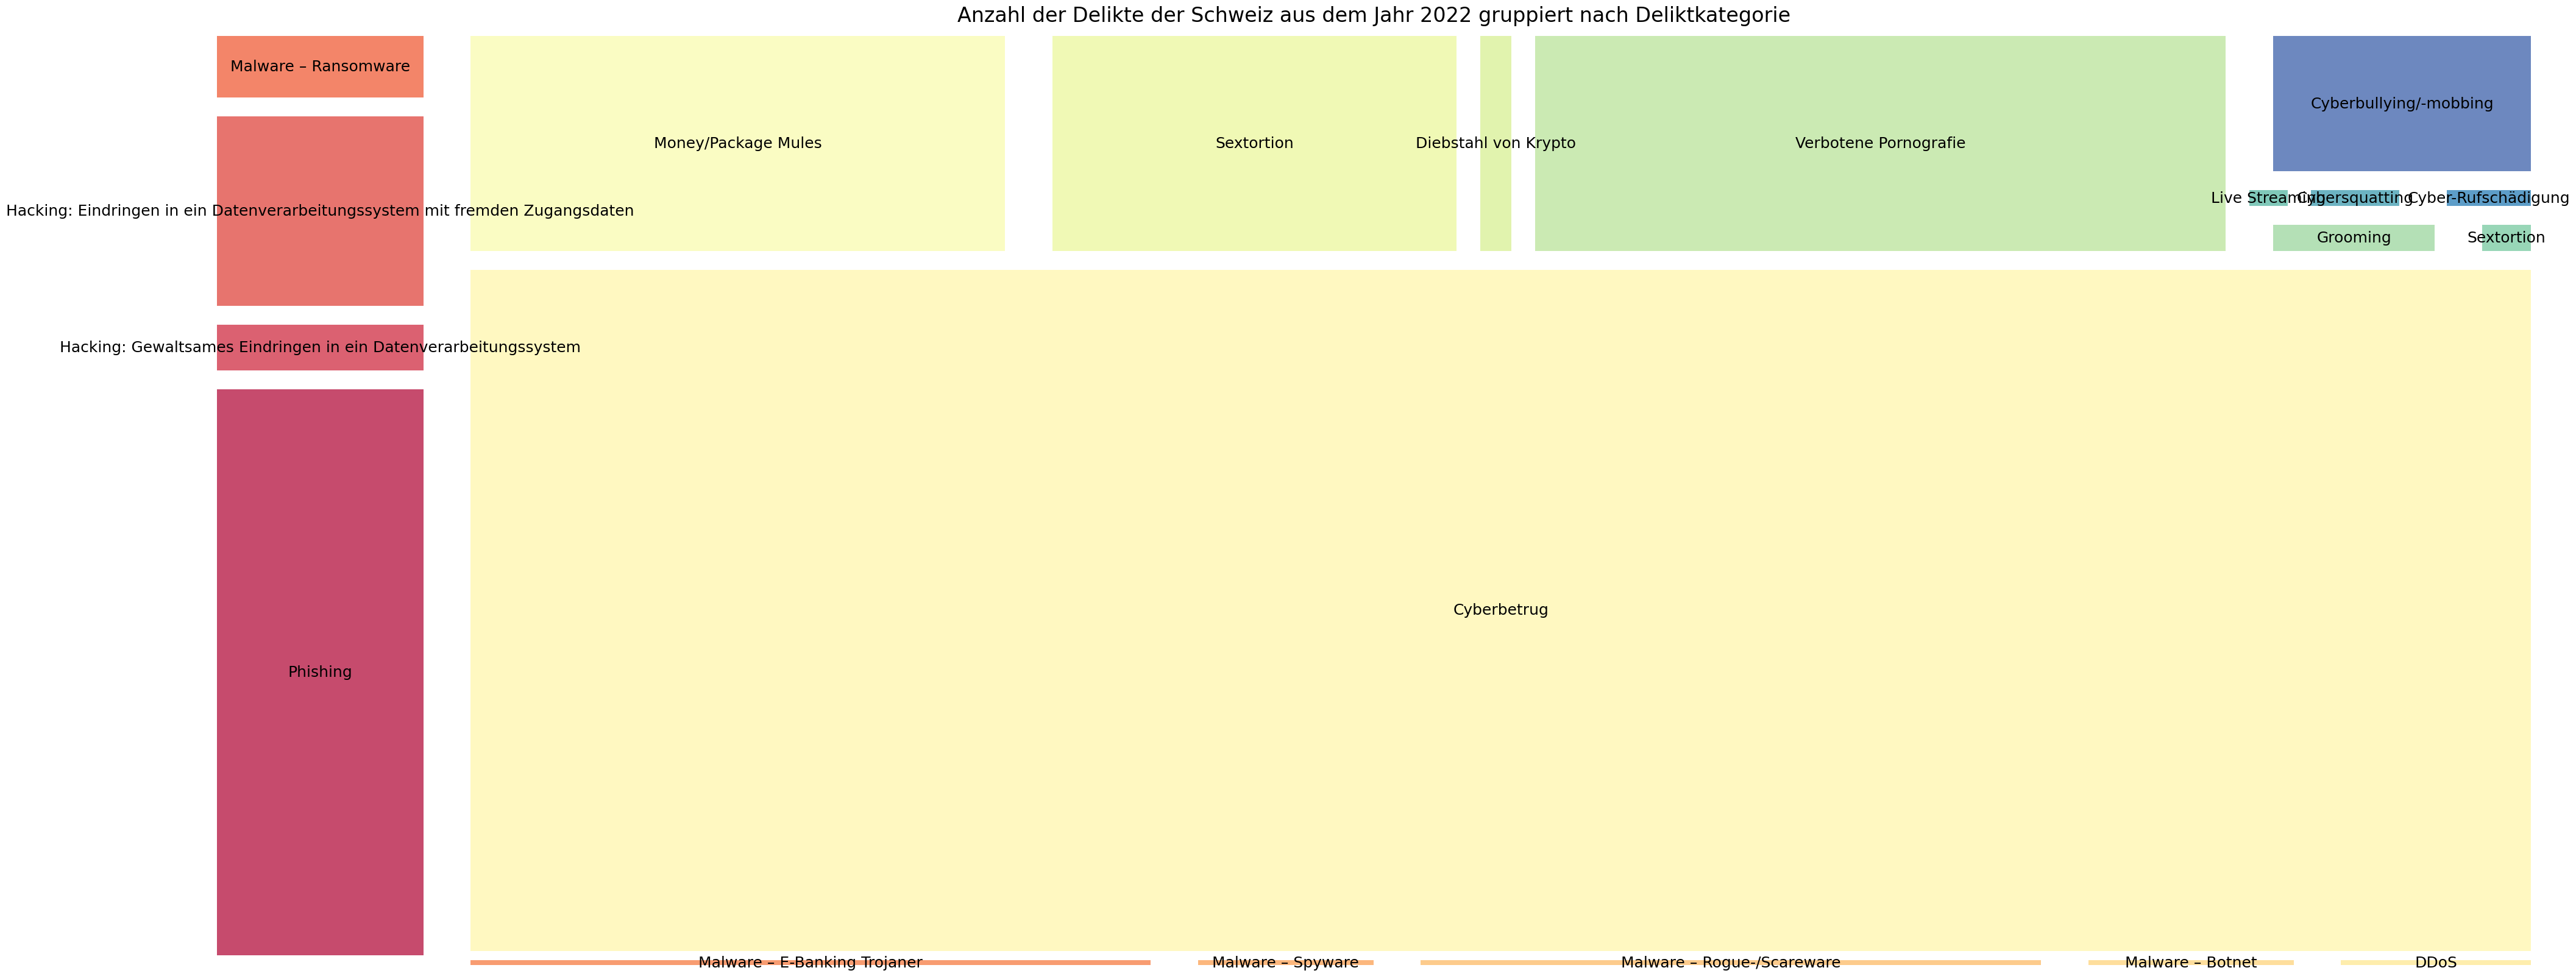

In [99]:
# Erstellung Treemap Plot zu den Daten aus dem Jahre 2022
# @title ### Anzahl der Delikte der Schweiz aus dem Jahr 2022 (gruppiert nach Deliktkategorie)
plt.figure(figsize=(50, 20))
axis = squarify.plot(sizes=master_cyber_ch_opfer.filter(like='2022', axis=0)['taten'], label=delikt_label, alpha=.8, pad = 1, text_kwargs={'fontsize': 18}, color=sns.color_palette('Spectral',n_colors=len(delikt_label)))
plt.axis('off')
axis.set_title("Anzahl der Delikte der Schweiz aus dem Jahr 2022 gruppiert nach Deliktkategorie", fontsize=24)

#### Anzahl der Delikte in der Schweiz aus dem Jahr 2022

Die Grafik zeigt zum einen auf, welche Arten von Delikten im Jahr 2022 in der Schweiz registriert wurden. Zum anderen zeigt die Grösse der Rechtecke, wie gross der Anteil einer Deliktkategorie im Verhältnis zu allen Delikten war. Unverändert gegenüber dem Jahr 2021 verzeichnet auch im Jahr 2022 die Kategorie "Cyberbetrug" die meisten Delikte. Auf dem zweiten Platz ist nun die Deliktkategorie "Phishing" gemeinsam mit Delikten der "verbotenen Pornografie". Die Delikte im Bereich Phishing haben somit von 2020 über 2021 bis ins Jahr 2022 stets zugenommen.

Abgenommen gegenüber den Vorjahren haben die Delikte im Bereich "Hacking: Gewaltsames Eindringen in ein Datenverarbeitungssystem" und "Malware - Ransomware".



Text(0.5, 1.0, 'Anzahl der Delikte der Schweiz aus dem Jahr 2023 gruppiert nach Deliktkategorie')

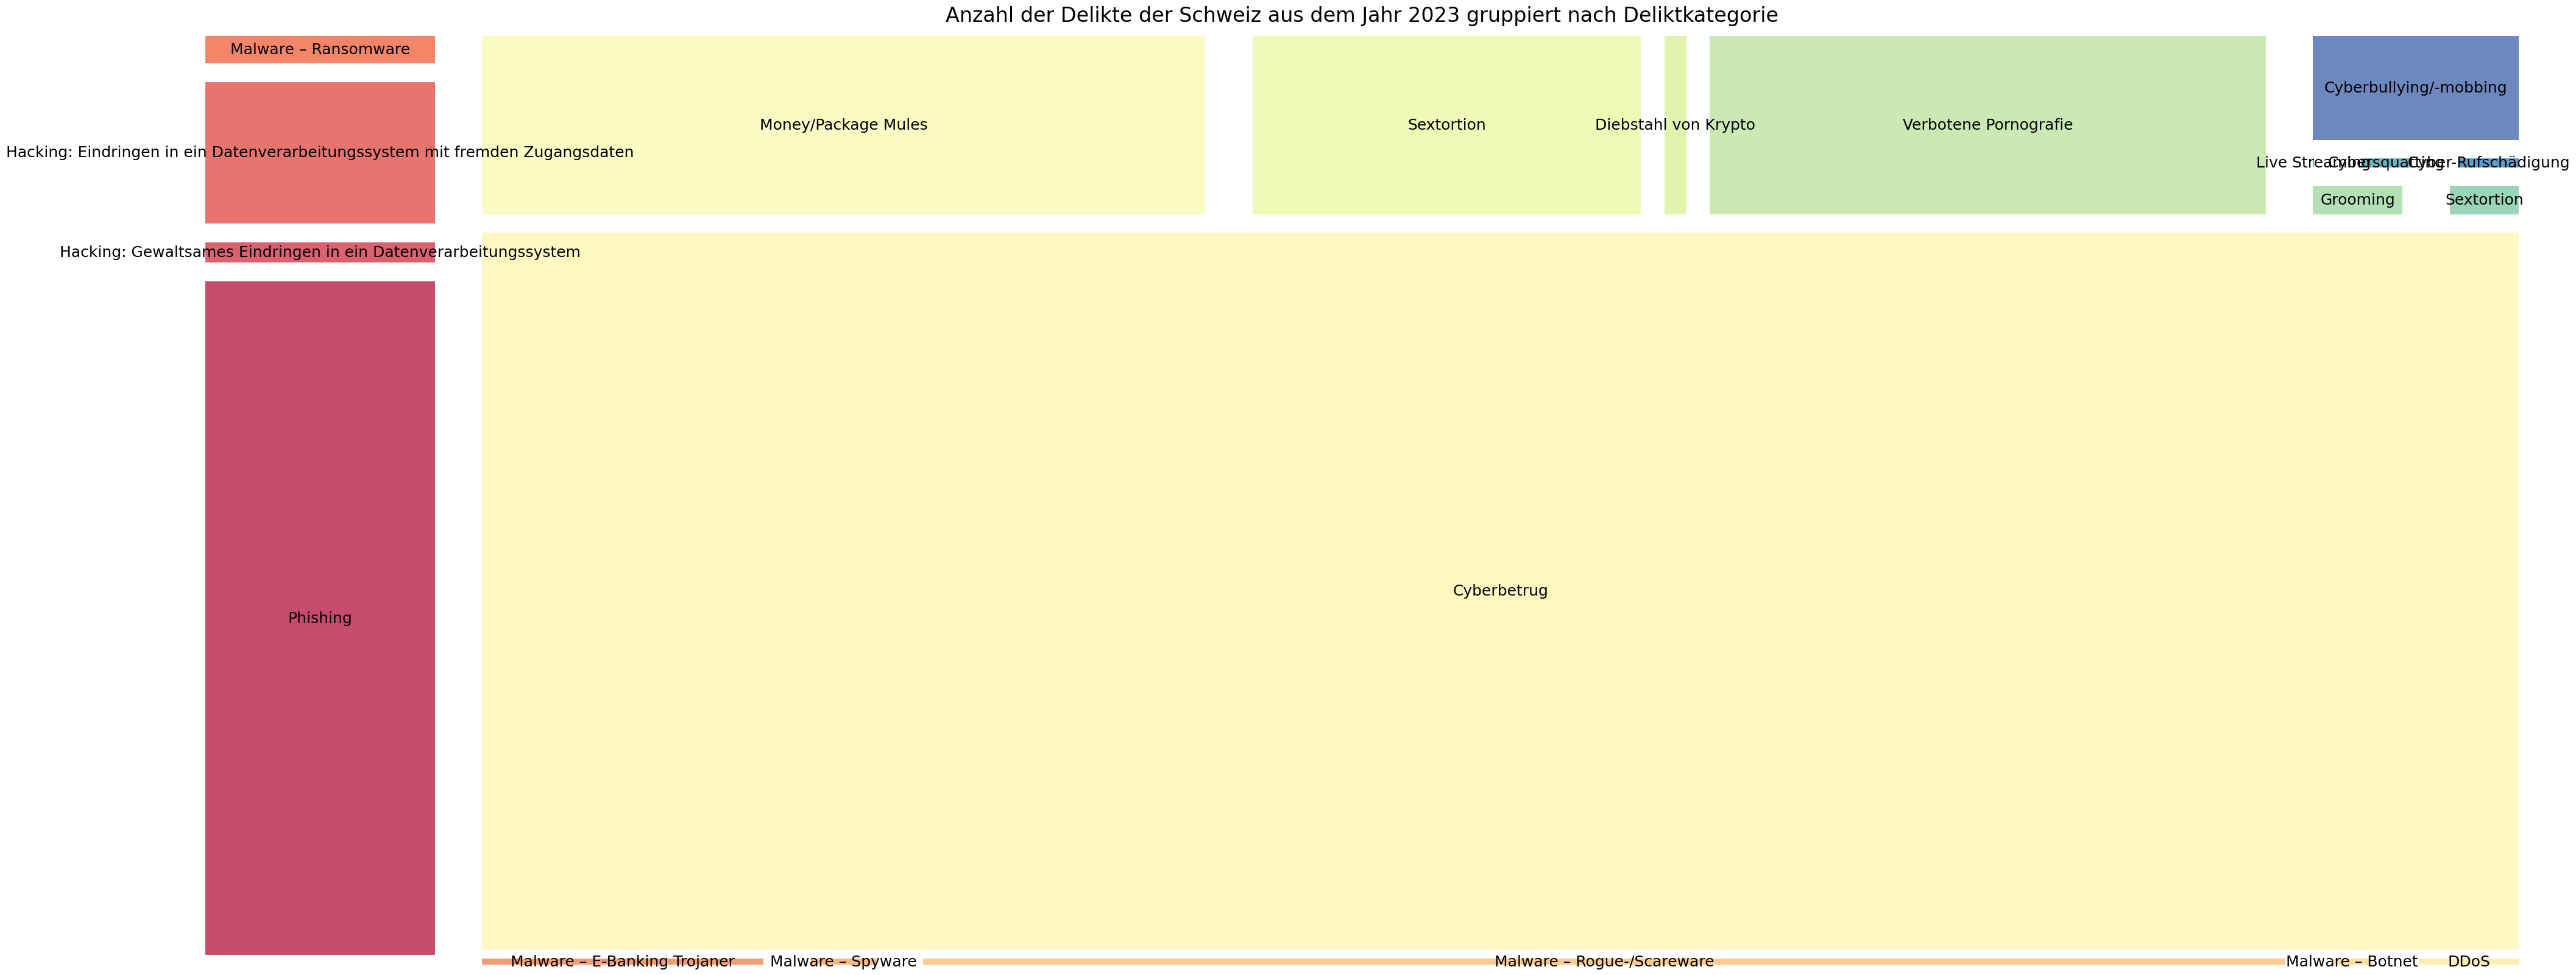

In [100]:
# Erstellung Treemap Plot zu den Daten aus dem Jahre 2023
# @title ### Anzahl der Delikte der Schweiz aus dem Jahr 2023 (gruppiert nach Deliktkategorie)
plt.figure(figsize=(50, 20))
axis = squarify.plot(sizes=master_cyber_ch_opfer.filter(like='2023', axis=0)['taten'], label=delikt_label, alpha=.8, pad = 1, text_kwargs={'fontsize': 18}, color=sns.color_palette('Spectral',n_colors=len(delikt_label)))
plt.axis('off')
axis.set_title("Anzahl der Delikte der Schweiz aus dem Jahr 2023 gruppiert nach Deliktkategorie", fontsize=24)

#### Anzahl der Delikte in der Schweiz aus dem Jahr 2023

Die Grafik zeigt zum einen auf, welche Arten von Delikten im Jahr 2023 in der Schweiz registriert wurden. Zum anderen zeigt die Grösse der Rechtecke, wie gross der Anteil einer Deliktkategorie im Verhältnis zu allen Delikten war. Unverändert gegenüber den Vorjahren verzeichnet auch im Jahr 2023 die Kategorie "Cyberbetrug" die meisten Delikte. Auf dem zweiten Platz ist nun alleinstehend die Deliktkategorie "Phishing". Der Trend in der Kategorie "Phishing" hat sich wie in den Vorjahren bestätigt und weiter zugenommen. Die Delikte der Kategorie "verbotene Pornografie" ist im Jahr 2023 nur noch die viertgrösste Deliktkategorie. Sie wurde im Jahr 2023 von der Kategorie "Money/Package Mules" überholt.

Abgenommen gegenüber den Vorjahren haben die Delikte im Bereich "Hacking: Gewaltsames Eindringen in ein Datenverarbeitungssystem" und "Malware - Ransomware".

Weiter abgenommen haben die Delikte der Kategorie "Hacking: Eindringen in ein Datenverarbeitungssystem mit Fremden Zugangsdaten"

In [101]:
# Filtering out the relevant offense categories 'Hacking: *' and 'Malware - *' for each year and according to the three age categories
# @title ## Vergleich Malware/Hacking Opfer mit Anzahl Bürger die Sicherheitssoftware auf PC / Smartphone verwenden

delikt_rows2020 = master_cyber_ch_opfer[1:8].filter(items=['15-29','30-59','>60']).values
delikt_rows2021 = master_cyber_ch_opfer.filter(like='2021', axis=0)[1:8].filter(items=['15-29','30-59','>60']).values
delikt_rows2022 = master_cyber_ch_opfer.filter(like='2022', axis=0)[1:8].filter(items=['15-29','30-59','>60']).values
delikt_rows2023 = master_cyber_ch_opfer.filter(like='2023', axis=0)[1:8].filter(items=['15-29','30-59','>60']).values

# Summation of all numbers of offenses according to age grouping
delikt_rows2020 = np.sum(delikt_rows2020, axis=0)
delikt_rows2021 = np.sum(delikt_rows2021, axis=0)
delikt_rows2022 = np.sum(delikt_rows2022, axis=0)
delikt_rows2023 = np.sum(delikt_rows2023, axis=0)

In [102]:
# Filtering out and sum up the behavior in relation to the use of security software for each year and according to the three age categories
verhalten_antivirus = master_internetsec_ch.filter(like='von Sicherheitssoftware', axis=0).groupby(level=['kategorie','alter']).sum()
verhalten_antivirus = verhalten_antivirus.reindex(columns=['2019','2021','2023'])

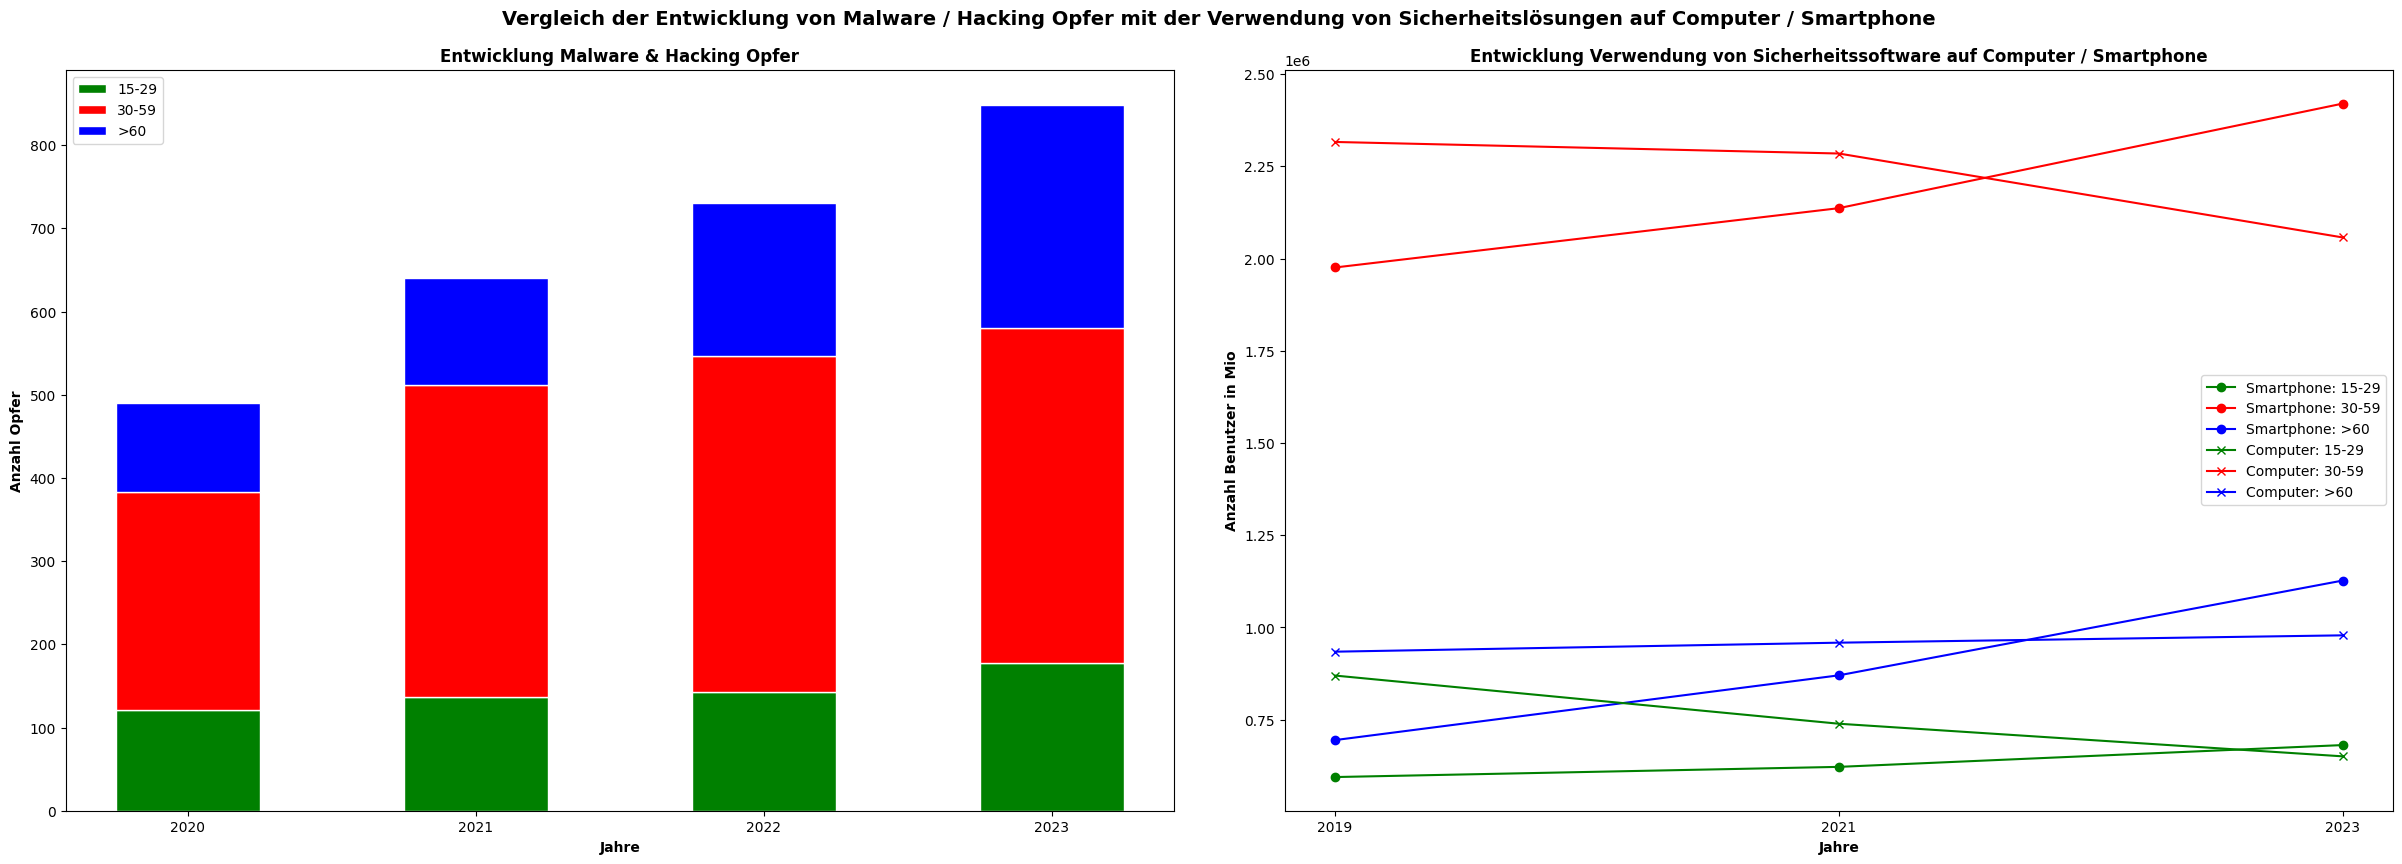

In [103]:

# Dual plot of two dependent values

## Plot about the development of malware and hacking victims
# set width of bars
barWidth = 0.5
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.tight_layout()

# labels plot1
labels_plot1 = ['2020', '2021', '2022', '2023']

# Heights of delikt_rows2020[0] + delikt_rows2020[1]
bars2020 = np.add(delikt_rows2020[0], delikt_rows2020[1]).tolist()

# Heights of delikt_rows2021[0] + delikt_rows2021[1]
bars2021 = np.add(delikt_rows2021[0], delikt_rows2021[1]).tolist()

# Heights of delikt_rows2022[0] + delikt_rows2022[1]
bars2022 = np.add(delikt_rows2022[0], delikt_rows2022[1]).tolist()

# Heights of delikt_rows2023[0] + delikt_rows2023[1]
bars2023 = np.add(delikt_rows2023[0], delikt_rows2023[1]).tolist()

# Set position of bar on X axis
r1 = [0.5]
r2 = [1.5]
r3 = [2.5]
r4 = [3.5]

# Make the bar plot1
ax[0].bar(r1, delikt_rows2020[0], color='green', width=barWidth, edgecolor='white', label='15-29')
ax[0].bar(r1, delikt_rows2020[1], bottom= delikt_rows2020[0], color='red', width=barWidth, edgecolor='white', label='30-59')
ax[0].bar(r1, delikt_rows2020[2], bottom= bars2020, color='blue', width=barWidth, edgecolor='white', label='>60')
ax[0].bar(r2, delikt_rows2021[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[1], bottom= delikt_rows2021[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[2], bottom= bars2021, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[1], bottom= delikt_rows2022[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[2], bottom= bars2022, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[1], bottom= delikt_rows2023[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[2], bottom= bars2023, color='blue', width=barWidth, edgecolor='white')

# Define chart settings plot1
ax[0].set_title('Entwicklung Malware & Hacking Opfer', fontweight='bold')
ax[0].set_xlabel('Jahre', fontweight='bold')
ax[0].set_ylabel('Anzahl Opfer', fontweight='bold')
ax[0].set_xticks([r + barWidth for r in range(len(labels_plot1))])
ax[0].set_xticklabels(labels_plot1)
ax[0].legend()

## Plot about the development in use of security solutions on computers and smartphones
# labels plot2
labels_plot2 = ['2019', '2021', '2023']

# Make the bar plot2
ax[1].plot(verhalten_antivirus.values[0], color='green', label='Smartphone: 15-29', marker='o')
ax[1].plot(verhalten_antivirus.values[1], color='red', label='Smartphone: 30-59', marker='o')
ax[1].plot(verhalten_antivirus.values[2], color='blue', label='Smartphone: >60', marker='o')
ax[1].plot(verhalten_antivirus.values[3], color='green', label='Computer: 15-29', marker='x')
ax[1].plot(verhalten_antivirus.values[4], color='red', label='Computer: 30-59', marker='x')
ax[1].plot(verhalten_antivirus.values[5], color='blue', label='Computer: >60', marker='x')

# Define chart settings plot2
ax[1].set_title('Entwicklung Verwendung von Sicherheitssoftware auf Computer / Smartphone', fontweight='bold')
ax[1].set_xlabel('Jahre', fontweight='bold')
ax[1].set_ylabel('Anzahl Benutzer in Mio', fontweight='bold')
ax[1].set_xticks([r for r in range(len(labels_plot2))])
ax[1].set_xticklabels(labels_plot2)
ax[1].legend()

# Create legend & Show graphic
fig.suptitle('Vergleich der Entwicklung von Malware / Hacking Opfer mit der Verwendung von Sicherheitslösungen auf Computer / Smartphone', fontweight='bold', fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.1)
plt.show()

#### Vergleich der Entwicklung von Malware und Hacking Opfer mit der Verwendung von Sicherheitslösungen auf Computer und Smartphones (2020-2023)
Der Grafik "Entwicklung Malware & Hacking Opfer" ist zu entnehmen, dass die Anzahl an Opfer kontinuierlich und nahezu linear über die Jahre und Altersklassen zugenommen hat.

Auffallend ist, dass die Opferzahl der Altersklasse der 15-29 Jähgrigen konstant tief bleibt. Während die Opferzahl bei den über 60 Jährigen stets zunimmt.

Das wirft weitere Fragen zum Verhalten der Benutzenden auf. Beispielsweise könnte es sein, dass die Altersklasse der 15-29 Jährigen in Sachen Schutzbedarf besser aufgeklärt ist als diejenige der über 60 Jährigen.



Die Grafik "Entwicklung Verwendung von Sicherheitssoftware auf Computer/Smartphone" zeigt die Anzahl der Benutzenden von Smartphones und von Computern nach Altersklasse an.  Daraus ist zu erkennen, dass die Altersklasse der 30-59 Järhrigen im Durchschnitt etwas mehr als zwei millionen Benutzer von Sicherheitssoftware auf Computer und Smartphones registriert hat. Dies lässt darauf schliessen, dass diese Altersklasse besonders sensibilisiert ist in Sachen Schutz der eigenen Hard- und Software.
Bei der Altersklasse der 15-29 Järhigen ist seit 2019 eine stete Abnahme bei der Verwendung von Sicherheitssoftware bei Computern zu verzeichnen. Die Verwendung von Sicherheitssoftware bei Smartphones nimmt seit 2019 zwar konstant zu, bewegt sich jedoch auf einem tiefen Level von weniger 750'000 Benutzenden.

Bei der Altersklasse der über 60 Jährigen nimmt die Verwendung von Sicherheitssoftware auf Computern und Smartphones konstant zu. Ein möglicher Schluss, der sich daraus ziehen lässt ist, dass diese Altersklasse durch gezielte Kampagnen sensibilisiert wurde.


In [104]:
# @title ## Vergleich Phising Opfer mit Sensibilisierung der Bevölkerung auf Phising Versuche / Vorkommen
# Filtering out the relevant offense categories 'Hacking: *' and 'Malware - *' for each year and according to the three age categories
delikt_rows2020 = master_cyber_ch_opfer[:1].filter(items=['15-29','30-59','>60']).values
delikt_rows2021 = master_cyber_ch_opfer.filter(like='2021', axis=0)[:1].filter(items=['15-29','30-59','>60']).values
delikt_rows2022 = master_cyber_ch_opfer.filter(like='2022', axis=0)[:1].filter(items=['15-29','30-59','>60']).values
delikt_rows2023 = master_cyber_ch_opfer.filter(like='2023', axis=0)[:1].filter(items=['15-29','30-59','>60']).values

# Summation of all numbers of offenses according to age grouping
delikt_rows2020 = np.sum(delikt_rows2020, axis=0)
delikt_rows2021 = np.sum(delikt_rows2021, axis=0)
delikt_rows2022 = np.sum(delikt_rows2022, axis=0)
delikt_rows2023 = np.sum(delikt_rows2023, axis=0)

In [105]:
# Filtering out and sum up the behavior in relation to the use of security software for each year and according to the three age categories
verhalten_phising = master_internetsec_ch.filter(like='(Phishing)', axis=0).groupby(level=['kategorie','alter']).sum()
verhalten_phising = verhalten_phising.reindex(columns=['2019','2021','2023'])

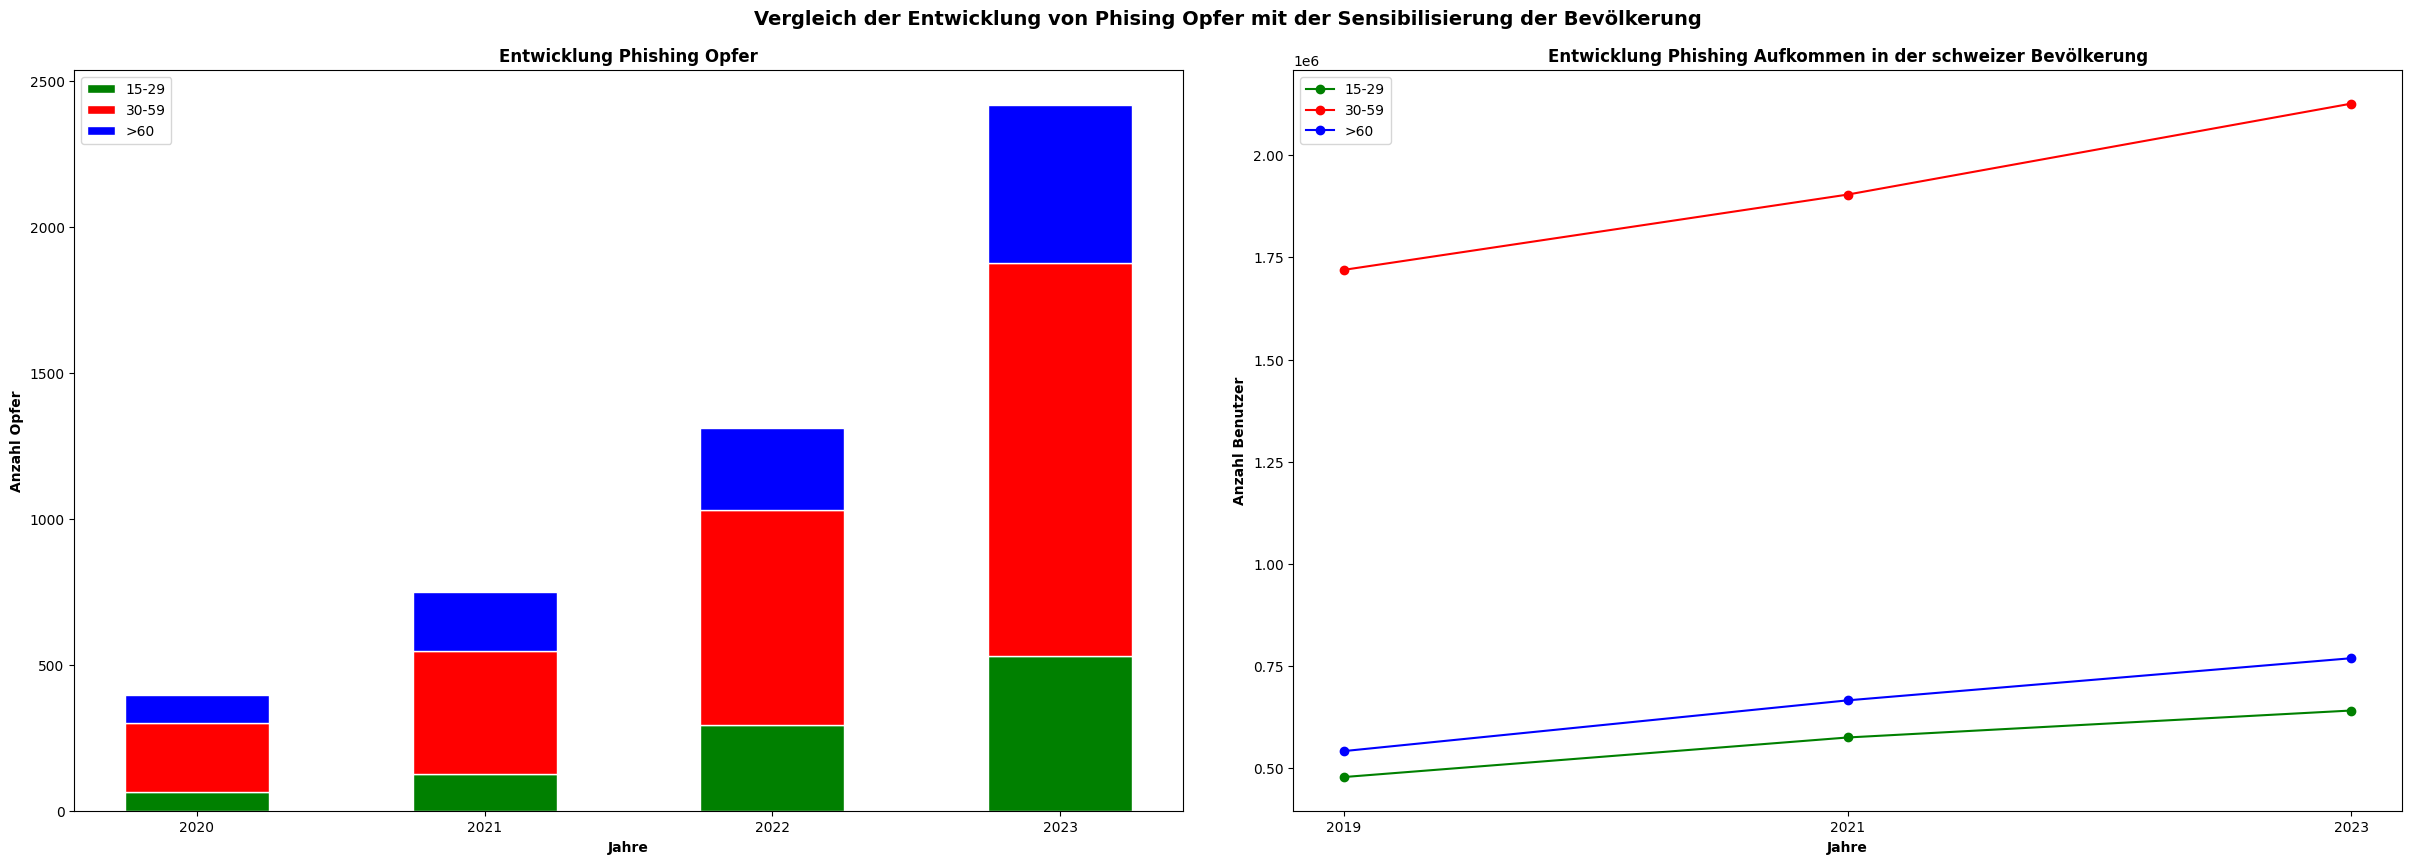

In [106]:
# Dual plot of two dependent values

## Plot about the development of phising victims
# set width of bars
barWidth = 0.5
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.tight_layout()

# labels plot1
labels_plot1 = ['2020', '2021', '2022', '2023']

# Heights of delikt_rows2020[0] + delikt_rows2020[1]
bars2020 = np.add(delikt_rows2020[0], delikt_rows2020[1]).tolist()

# Heights of delikt_rows2021[0] + delikt_rows2021[1]
bars2021 = np.add(delikt_rows2021[0], delikt_rows2021[1]).tolist()

# Heights of delikt_rows2022[0] + delikt_rows2022[1]
bars2022 = np.add(delikt_rows2022[0], delikt_rows2022[1]).tolist()

# Heights of delikt_rows2023[0] + delikt_rows2023[1]
bars2023 = np.add(delikt_rows2023[0], delikt_rows2023[1]).tolist()

# Set position of bar on X axis
r1 = [0.5]
r2 = [1.5]
r3 = [2.5]
r4 = [3.5]

# Make the bar plot1
ax[0].bar(r1, delikt_rows2020[0], color='green', width=barWidth, edgecolor='white', label='15-29')
ax[0].bar(r1, delikt_rows2020[1], bottom= delikt_rows2020[0], color='red', width=barWidth, edgecolor='white', label='30-59')
ax[0].bar(r1, delikt_rows2020[2], bottom= bars2020, color='blue', width=barWidth, edgecolor='white', label='>60')
ax[0].bar(r2, delikt_rows2021[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[1], bottom= delikt_rows2021[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[2], bottom= bars2021, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[1], bottom= delikt_rows2022[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[2], bottom= bars2022, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[1], bottom= delikt_rows2023[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[2], bottom= bars2023, color='blue', width=barWidth, edgecolor='white')

# Define chart settings plot1
ax[0].set_title('Entwicklung Phishing Opfer', fontweight='bold')
ax[0].set_xlabel('Jahre', fontweight='bold')
ax[0].set_ylabel('Anzahl Opfer', fontweight='bold')
ax[0].set_xticks([r + barWidth for r in range(len(labels_plot1))])
ax[0].set_xticklabels(labels_plot1)
ax[0].legend()

## Plot about the development in sensitization of phising
# labels plot2
labels_plot2 = ['2019', '2021', '2023']

# Make the bar plot2
ax[1].plot(verhalten_phising.values[0], color='green', label='15-29', marker='o')
ax[1].plot(verhalten_phising.values[1], color='red', label='30-59', marker='o')
ax[1].plot(verhalten_phising.values[2], color='blue', label='>60', marker='o')

# Define chart settings plot2
ax[1].set_title('Entwicklung Phishing Aufkommen in der schweizer Bevölkerung', fontweight='bold')
ax[1].set_xlabel('Jahre', fontweight='bold')
ax[1].set_ylabel('Anzahl Benutzer', fontweight='bold')
ax[1].set_xticks([r for r in range(len(labels_plot2))])
ax[1].set_xticklabels(labels_plot2)
ax[1].legend()

# Create legend & Show graphic
fig.suptitle('Vergleich der Entwicklung von Phising Opfer mit der Sensibilisierung der Bevölkerung', fontweight='bold', fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.1)
plt.show()

#### Vergleich der Entwicklung von Phishing Opfer mit der Sensibilisierung der Bevölkerung (2020-2023)

Der Grafik "Entwicklung Phishing Opfer" ist zu entnehmen, dass über die Jahre 2020 bis 2023 eine regelrechte Explosion von Attacken stattgefunden hat. Dies zeigt sich insbesondere, wenn man die Jahre 2020 und 2023 miteinander vergleicht. Im Jahr 2020 wurde eine Gesamtopferzahl von knapp unter 500 verzeichnet. Drei Jahre später im Jahr 2023, liegt die Opferzahl für dieselbe Deliktkategorie bei knapp unter 2500 gemeldeten Fällen. Die grösste Altersklasse der von diesen Attacken betroffenen Opfer ist mit Abstand diejenige der 30-59 Jährigen. Dies veranschaulicht die Grafik "Entwicklung Phishing Aufkommen in der Schweizer Bevölkerung". Aus dieser Grafik kristallisiert sich heraus, dass diese Gruppe die mit Abstand am stärksten betroffene ist.
Zu erkennen ist jedoch auch, dass sich die Anzahl der Opfer von 2019 bis 2023 nahezu linear aufsteigend entwickelt.


In [107]:
# @title ## Vergleich Ransomware Opfer mit Backupverhaltend der Bevölkerung
# Filtering out the relevant offense categories 'Hacking: *' and 'Malware - *' for each year and according to the three age categories
delikt_rows2020 = master_cyber_ch_opfer[3:4].filter(items=['15-29','30-59','>60']).values
delikt_rows2021 = master_cyber_ch_opfer.filter(like='2021', axis=0)[3:4].filter(items=['15-29','30-59','>60']).values
delikt_rows2022 = master_cyber_ch_opfer.filter(like='2022', axis=0)[3:4].filter(items=['15-29','30-59','>60']).values
delikt_rows2023 = master_cyber_ch_opfer.filter(like='2023', axis=0)[3:4].filter(items=['15-29','30-59','>60']).values

# Summation of all numbers of offenses according to age grouping
delikt_rows2020 = np.sum(delikt_rows2020, axis=0)
delikt_rows2021 = np.sum(delikt_rows2021, axis=0)
delikt_rows2022 = np.sum(delikt_rows2022, axis=0)
delikt_rows2023 = np.sum(delikt_rows2023, axis=0)

In [108]:
# Filtering out and sum up the behavior in relation to the use of security software for each year and according to the three age categories
verhalten_backup = master_internetsec_ch.filter(like='Sicherheitskopien', axis=0).groupby(level=['kategorie','alter']).sum()
verhalten_backup = verhalten_backup.reindex(columns=['2019','2021','2023'])

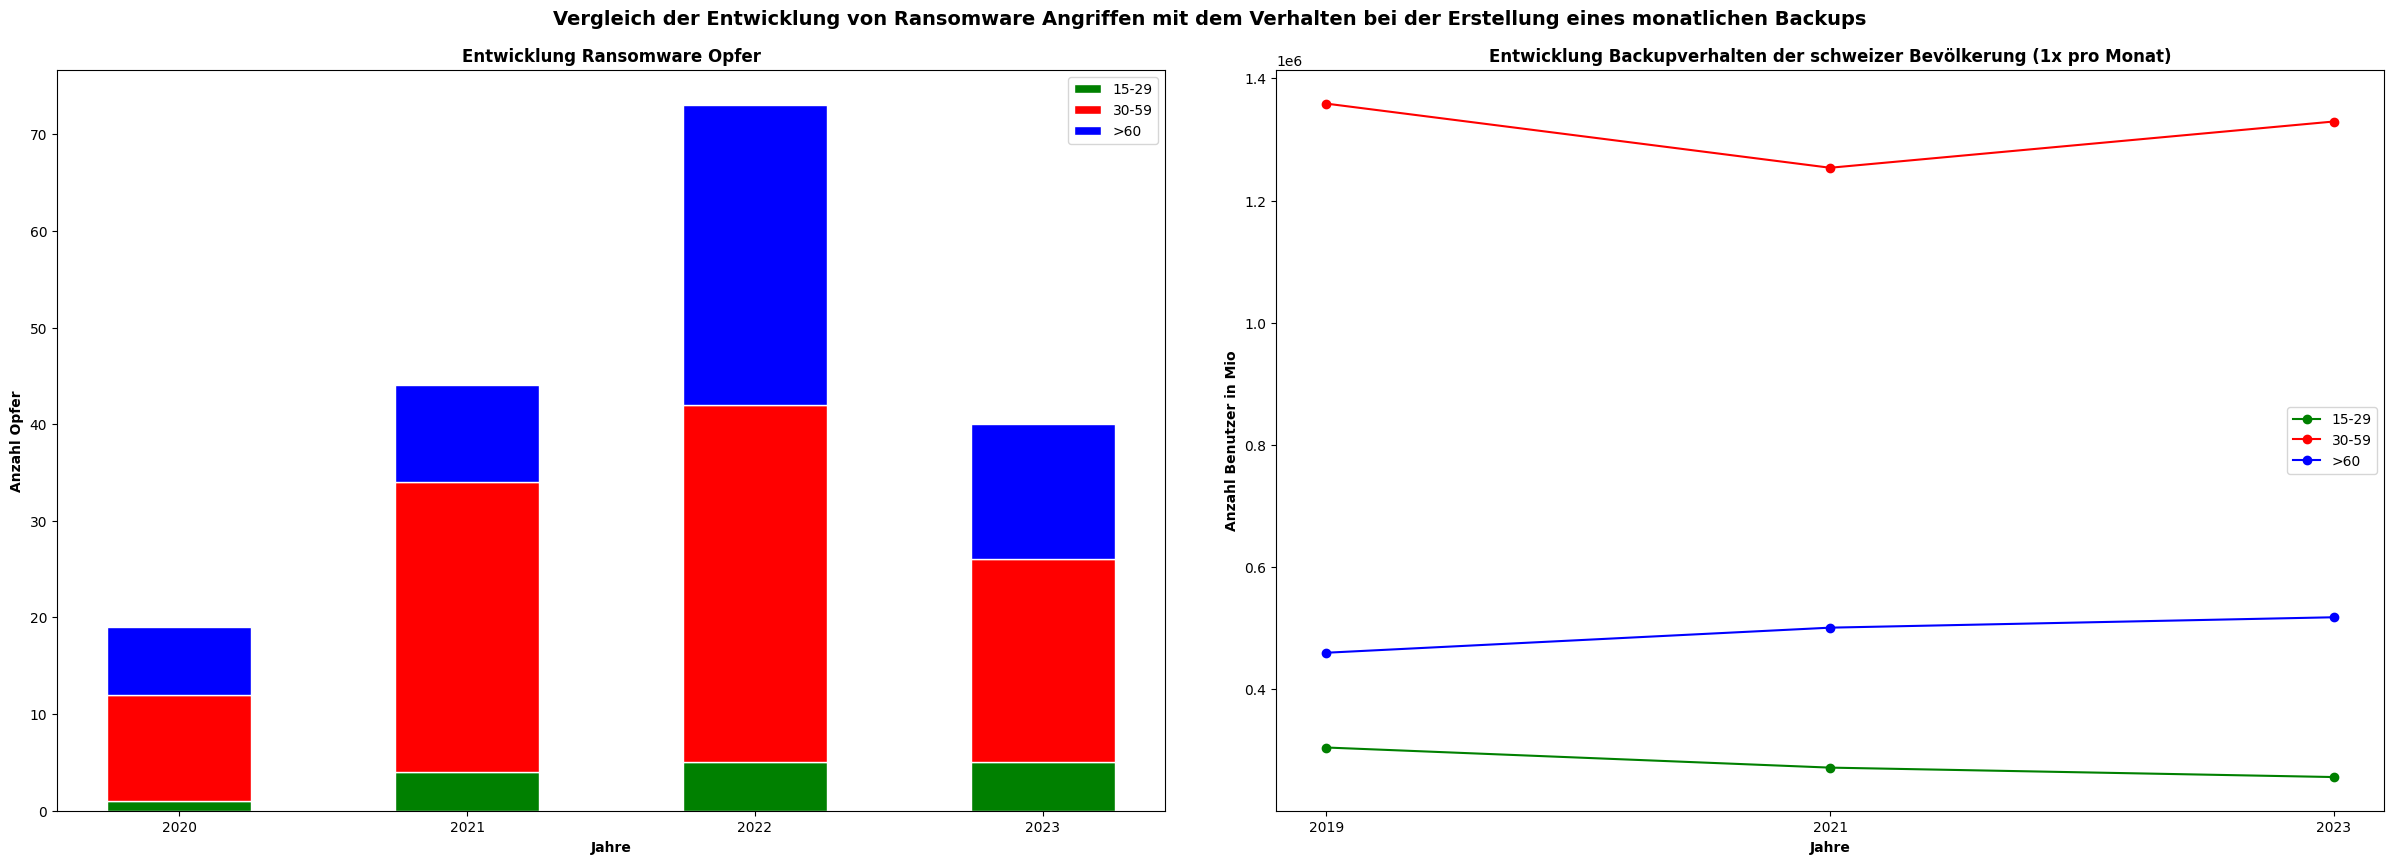

In [109]:
# Dual plot of two dependent values

## Plot about the development of ransomware victims
# set width of bars
barWidth = 0.5
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.tight_layout()

# labels plot1
labels_plot1 = ['2020', '2021', '2022', '2023']

# Heights of delikt_rows2020[0] + delikt_rows2020[1]
bars2020 = np.add(delikt_rows2020[0], delikt_rows2020[1]).tolist()

# Heights of delikt_rows2021[0] + delikt_rows2021[1]
bars2021 = np.add(delikt_rows2021[0], delikt_rows2021[1]).tolist()

# Heights of delikt_rows2022[0] + delikt_rows2022[1]
bars2022 = np.add(delikt_rows2022[0], delikt_rows2022[1]).tolist()

# Heights of delikt_rows2023[0] + delikt_rows2023[1]
bars2023 = np.add(delikt_rows2023[0], delikt_rows2023[1]).tolist()

# Set position of bar on X axis
r1 = [0.5]
r2 = [1.5]
r3 = [2.5]
r4 = [3.5]

# Make the bar plot1
ax[0].bar(r1, delikt_rows2020[0], color='green', width=barWidth, edgecolor='white', label='15-29')
ax[0].bar(r1, delikt_rows2020[1], bottom= delikt_rows2020[0], color='red', width=barWidth, edgecolor='white', label='30-59')
ax[0].bar(r1, delikt_rows2020[2], bottom= bars2020, color='blue', width=barWidth, edgecolor='white', label='>60')
ax[0].bar(r2, delikt_rows2021[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[1], bottom= delikt_rows2021[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[2], bottom= bars2021, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[1], bottom= delikt_rows2022[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[2], bottom= bars2022, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[1], bottom= delikt_rows2023[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[2], bottom= bars2023, color='blue', width=barWidth, edgecolor='white')

# Define chart settings plot1
ax[0].set_title('Entwicklung Ransomware Opfer', fontweight='bold')
ax[0].set_xlabel('Jahre', fontweight='bold')
ax[0].set_ylabel('Anzahl Opfer', fontweight='bold')
ax[0].set_xticks([r + barWidth for r in range(len(labels_plot1))])
ax[0].set_xticklabels(labels_plot1)
ax[0].legend()

## Plot about the development in doing backups of personal systems
# labels plot2
labels_plot2 = ['2019', '2021', '2023']

# Make the bar plot2
ax[1].plot(verhalten_backup.values[0], color='green', label='15-29', marker='o')
ax[1].plot(verhalten_backup.values[1], color='red', label='30-59', marker='o')
ax[1].plot(verhalten_backup.values[2], color='blue', label='>60', marker='o')

# Define chart settings plot2
ax[1].set_title('Entwicklung Backupverhalten der schweizer Bevölkerung (1x pro Monat)', fontweight='bold')
ax[1].set_xlabel('Jahre', fontweight='bold')
ax[1].set_ylabel('Anzahl Benutzer in Mio', fontweight='bold')
ax[1].set_xticks([r for r in range(len(labels_plot2))])
ax[1].set_xticklabels(labels_plot2)
ax[1].legend()

# Create legend & Show graphic
fig.suptitle('Vergleich der Entwicklung von Ransomware Angriffen mit dem Verhalten bei der Erstellung eines monatlichen Backups', fontweight='bold', fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.1)
plt.show()

#### Vergleich der Entwicklung von Ransomware Angriffen mit dem Verhalten bei der Erstellung eines monatlichen Backups (2020-2023)
In der Grafik "Entwicklung Ransomware Opfer" ist von 2020 bis 2022 eine starke Zunahme über alle Alterskategorien, mit Ausnahme derjenigen der 15-29 Jährigen, zu vernehmen. Im Jahr 2022 war die Altersklasse der über 60 Jährigen besonders stark betroffen. Im Jahr 2023 ist ein drastischer Rückgang von Ransomware Opfern zu verzeichnen. Dieser Rückgang kam für das Projektteam überraschend. Es bleibt abzuwarten, ob dies ein Ausreisser ist oder ob sich der positive Trend im Jahr 2024 bestätigt.


In der Grafik "Entwicklung Backupverhalten der Schweizer Bevölkerung (1x pro Monat)" ist zu sehen, dass die 30-59 Jährigen Ihre Geräte besonders zuverlässig sichern. Die Alterskategorie der über 60 Jährigen befindet sich im Durchschnitt bei etwa 500'000 Benutzenden die mindestens ein Mal pro Monat ein Backup machen. Wobei sich die Altersklasse der 15-29 Jährigen als nicht sehr Backup-begeistert zeigt. So machen von dieser Altersgruppe unter 200'000 Benutzende mindestens ein Mal pro Monat ein Backup.

Die Anzahl der Backups stimmt weitestgehend, jedoch mit Ausnahme des Jahres 2022, mit den Opferzahlen überein.

Im Jahr 2021 ist insbesondere bei den 30-59 Jährigen ein Einbruch beim Backupverhalten zu verzeichnen, was sich womöglich gerächt hat, weil die Anzahl Opfer im Jahr 2022 massiv gestiegen ist.  


In [110]:
# @title ##Vergleich Cyberbetrug Opfer mit dem Aufkommen an SPAM Mails und Checken der Websitensicherheit
# Filtering out the relevant offense categories 'Hacking: *' and 'Malware - *' for each year and according to the three age categories
delikt_rows2020 = master_cyber_ch_opfer[9:10].filter(items=['15-29','30-59','>60']).values
delikt_rows2021 = master_cyber_ch_opfer.filter(like='2021', axis=0)[9:10].filter(items=['15-29','30-59','>60']).values
delikt_rows2022 = master_cyber_ch_opfer.filter(like='2022', axis=0)[9:10].filter(items=['15-29','30-59','>60']).values
delikt_rows2023 = master_cyber_ch_opfer.filter(like='2023', axis=0)[9:10].filter(items=['15-29','30-59','>60']).values

# Summation of all numbers of offenses according to age grouping
delikt_rows2020 = np.sum(delikt_rows2020, axis=0)
delikt_rows2021 = np.sum(delikt_rows2021, axis=0)
delikt_rows2022 = np.sum(delikt_rows2022, axis=0)
delikt_rows2023 = np.sum(delikt_rows2023, axis=0)

In [111]:
# Filtering out and sum up the behavior in relation to the use of security software for each year and according to the three age categories
verhalten_spam = master_internetsec_ch.filter(like='Empfang von Spam', axis=0).groupby(level=['kategorie','alter']).sum()
verhalten_spam = verhalten_spam.reindex(columns=['2019','2021','2023'])

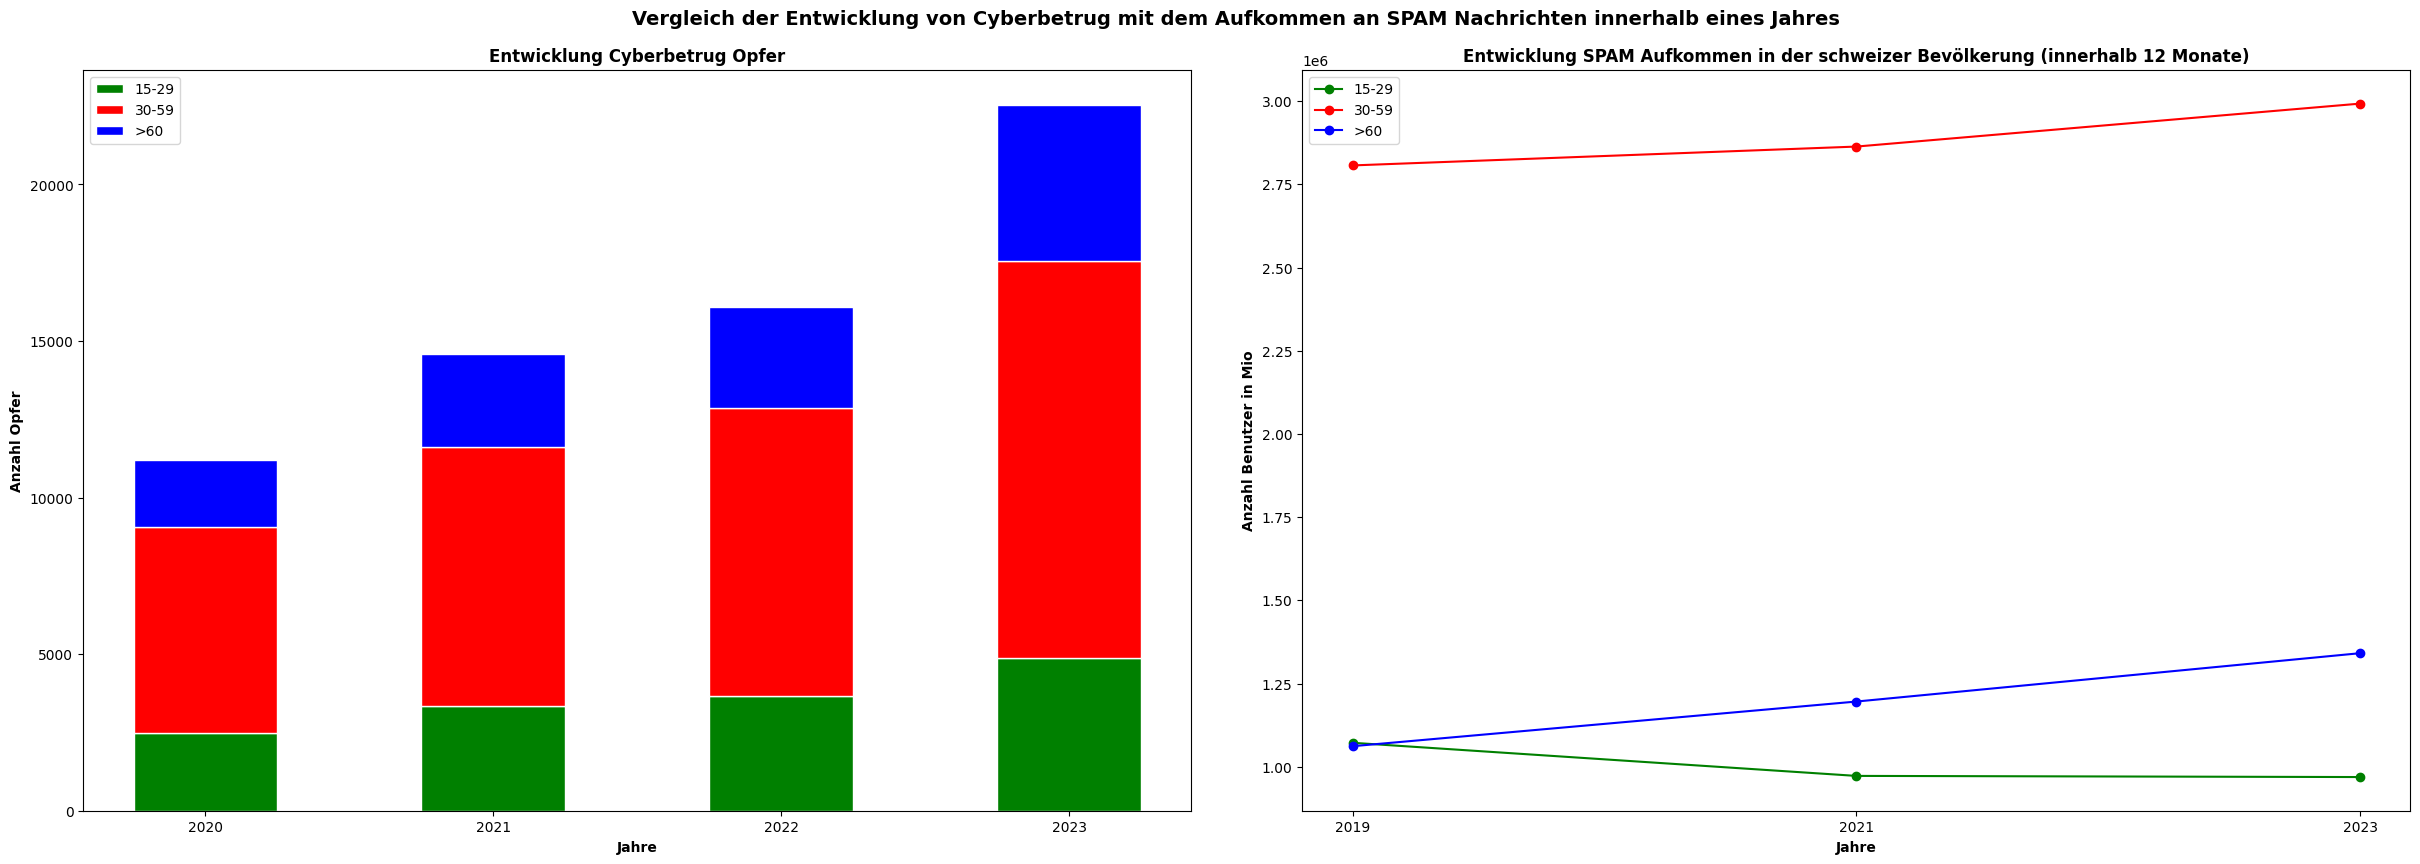

In [112]:
# Dual plot of two dependent values

## Plot about the development of cyber fraud victims
# set width of bars
barWidth = 0.5
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.tight_layout()

# labels plot1
labels_plot1 = ['2020', '2021', '2022', '2023']

# Heights of delikt_rows2020[0] + delikt_rows2020[1]
bars2020 = np.add(delikt_rows2020[0], delikt_rows2020[1]).tolist()

# Heights of delikt_rows2021[0] + delikt_rows2021[1]
bars2021 = np.add(delikt_rows2021[0], delikt_rows2021[1]).tolist()

# Heights of delikt_rows2022[0] + delikt_rows2022[1]
bars2022 = np.add(delikt_rows2022[0], delikt_rows2022[1]).tolist()

# Heights of delikt_rows2023[0] + delikt_rows2023[1]
bars2023 = np.add(delikt_rows2023[0], delikt_rows2023[1]).tolist()

# Set position of bar on X axis
r1 = [0.5]
r2 = [1.5]
r3 = [2.5]
r4 = [3.5]

# Make the bar plot1
ax[0].bar(r1, delikt_rows2020[0], color='green', width=barWidth, edgecolor='white', label='15-29')
ax[0].bar(r1, delikt_rows2020[1], bottom= delikt_rows2020[0], color='red', width=barWidth, edgecolor='white', label='30-59')
ax[0].bar(r1, delikt_rows2020[2], bottom= bars2020, color='blue', width=barWidth, edgecolor='white', label='>60')
ax[0].bar(r2, delikt_rows2021[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[1], bottom= delikt_rows2021[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r2, delikt_rows2021[2], bottom= bars2021, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[1], bottom= delikt_rows2022[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r3, delikt_rows2022[2], bottom= bars2022, color='blue', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[0], color='green', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[1], bottom= delikt_rows2023[0], color='red', width=barWidth, edgecolor='white')
ax[0].bar(r4, delikt_rows2023[2], bottom= bars2023, color='blue', width=barWidth, edgecolor='white')

# Define chart settings plot1
ax[0].set_title('Entwicklung Cyberbetrug Opfer', fontweight='bold')
ax[0].set_xlabel('Jahre', fontweight='bold')
ax[0].set_ylabel('Anzahl Opfer', fontweight='bold')
ax[0].set_xticks([r + barWidth for r in range(len(labels_plot1))])
ax[0].set_xticklabels(labels_plot1)
ax[0].legend()

## Plot about the development of getting spam messages
# labels plot2
labels_plot2 = ['2019', '2021', '2023']

# Make the bar plot2
ax[1].plot(verhalten_spam.values[0], color='green', label='15-29', marker='o')
ax[1].plot(verhalten_spam.values[1], color='red', label='30-59', marker='o')
ax[1].plot(verhalten_spam.values[2], color='blue', label='>60', marker='o')

# Define chart settings plot2
ax[1].set_title('Entwicklung SPAM Aufkommen in der schweizer Bevölkerung (innerhalb 12 Monate)', fontweight='bold')
ax[1].set_xlabel('Jahre', fontweight='bold')
ax[1].set_ylabel('Anzahl Benutzer in Mio', fontweight='bold')
ax[1].set_xticks([r for r in range(len(labels_plot2))])
ax[1].set_xticklabels(labels_plot2)
ax[1].legend()

# Create legend & Show graphic
fig.suptitle('Vergleich der Entwicklung von Cyberbetrug mit dem Aufkommen an SPAM Nachrichten innerhalb eines Jahres', fontweight='bold', fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.1)
plt.show()

#### Vergleich der Entwicklung von Cyberbetrug mit dem Aufkommen an SPAM Nachrichten innerhalb eines Jahres (2020-2023)

Der Grafik "Entwicklung Cyberbetrug Opfer" ist zu entnehmen, dass die Entwicklung von Cyberbetrug Opfern von 2020 bis 2022 kontinuierlich zugenommen hat. Von 2022 auf 2023 ist ein sprunghafter Anstieg zu verzeichnen.

Dies bestätigt sich auch in der Grafik "Entwicklung SPAM Aufkommen in der Schweizer Bevölkerung (innerhalb 12 Monate)". Dieser Grafik ist auch zu entnehmen, das die 30-29 Jährigen die am meisten von SPAM betroffene Alterskategorie ist. Im Gegensatz zu den beiden anderen Alterskategorien, ist bei den 15-29 Jährigen eine kontinuierliche Abnahme der Vorfälle zu verzeichnen. Dies ist jedoch widersprüchlich, da die Opferzahlen der Altersklasse über den selben Zeitraum zugenommen haben.


In [113]:
# @title ## Schutzverhalten der Schweizer Bürger im Vergleich zu den Deliktzahlen der Schweiz nach Geschlecht
# Filtering out the relevant offense categories 'Hacking: *' and 'Malware - *' for each year and according to the three age categories
delikt_rows2020 = master_cyber_ch_opfer.filter(like='2020', axis=0).filter(items=['taten','mann','frau']).values
delikt_rows2021 = master_cyber_ch_opfer.filter(like='2021', axis=0).filter(items=['taten','mann','frau']).values
delikt_rows2022 = master_cyber_ch_opfer.filter(like='2022', axis=0).filter(items=['taten','mann','frau']).values
delikt_rows2023 = master_cyber_ch_opfer.filter(like='2023', axis=0).filter(items=['taten','mann','frau']).values

# Summation of all numbers of offenses according to age grouping
delikt_rows2020 = np.sum(delikt_rows2020, axis=0)
delikt_rows2021 = np.sum(delikt_rows2021, axis=0)
delikt_rows2022 = np.sum(delikt_rows2022, axis=0)
delikt_rows2023 = np.sum(delikt_rows2023, axis=0)

# Combine all arrays and invert them
delikt_rows = np.dstack([delikt_rows2020,delikt_rows2021,delikt_rows2022,delikt_rows2023])

In [114]:
# Filtering out and sum up the behavior in relation to the use of security software for each year and according to the three age categories
verhalten_schutz = master_internetsec_ch.filter(like='Datenschutzbedingung', axis=0).drop(['2019'],axis=1).groupby(level=['kategorie','sex']).sum()
verhalten_schutz = pd.concat([verhalten_schutz, master_internetsec_ch.filter(like='Website', axis=0).drop(['2019'],axis=1).groupby(level=['kategorie','sex']).sum()])
verhalten_schutz = pd.concat([verhalten_schutz, master_internetsec_ch.filter(like='Beschränkung des Zugangs', axis=0).drop(['2019'],axis=1).groupby(level=['kategorie','sex']).sum()])
verhalten_schutz = verhalten_schutz.reindex(columns=['2021','2023']).values

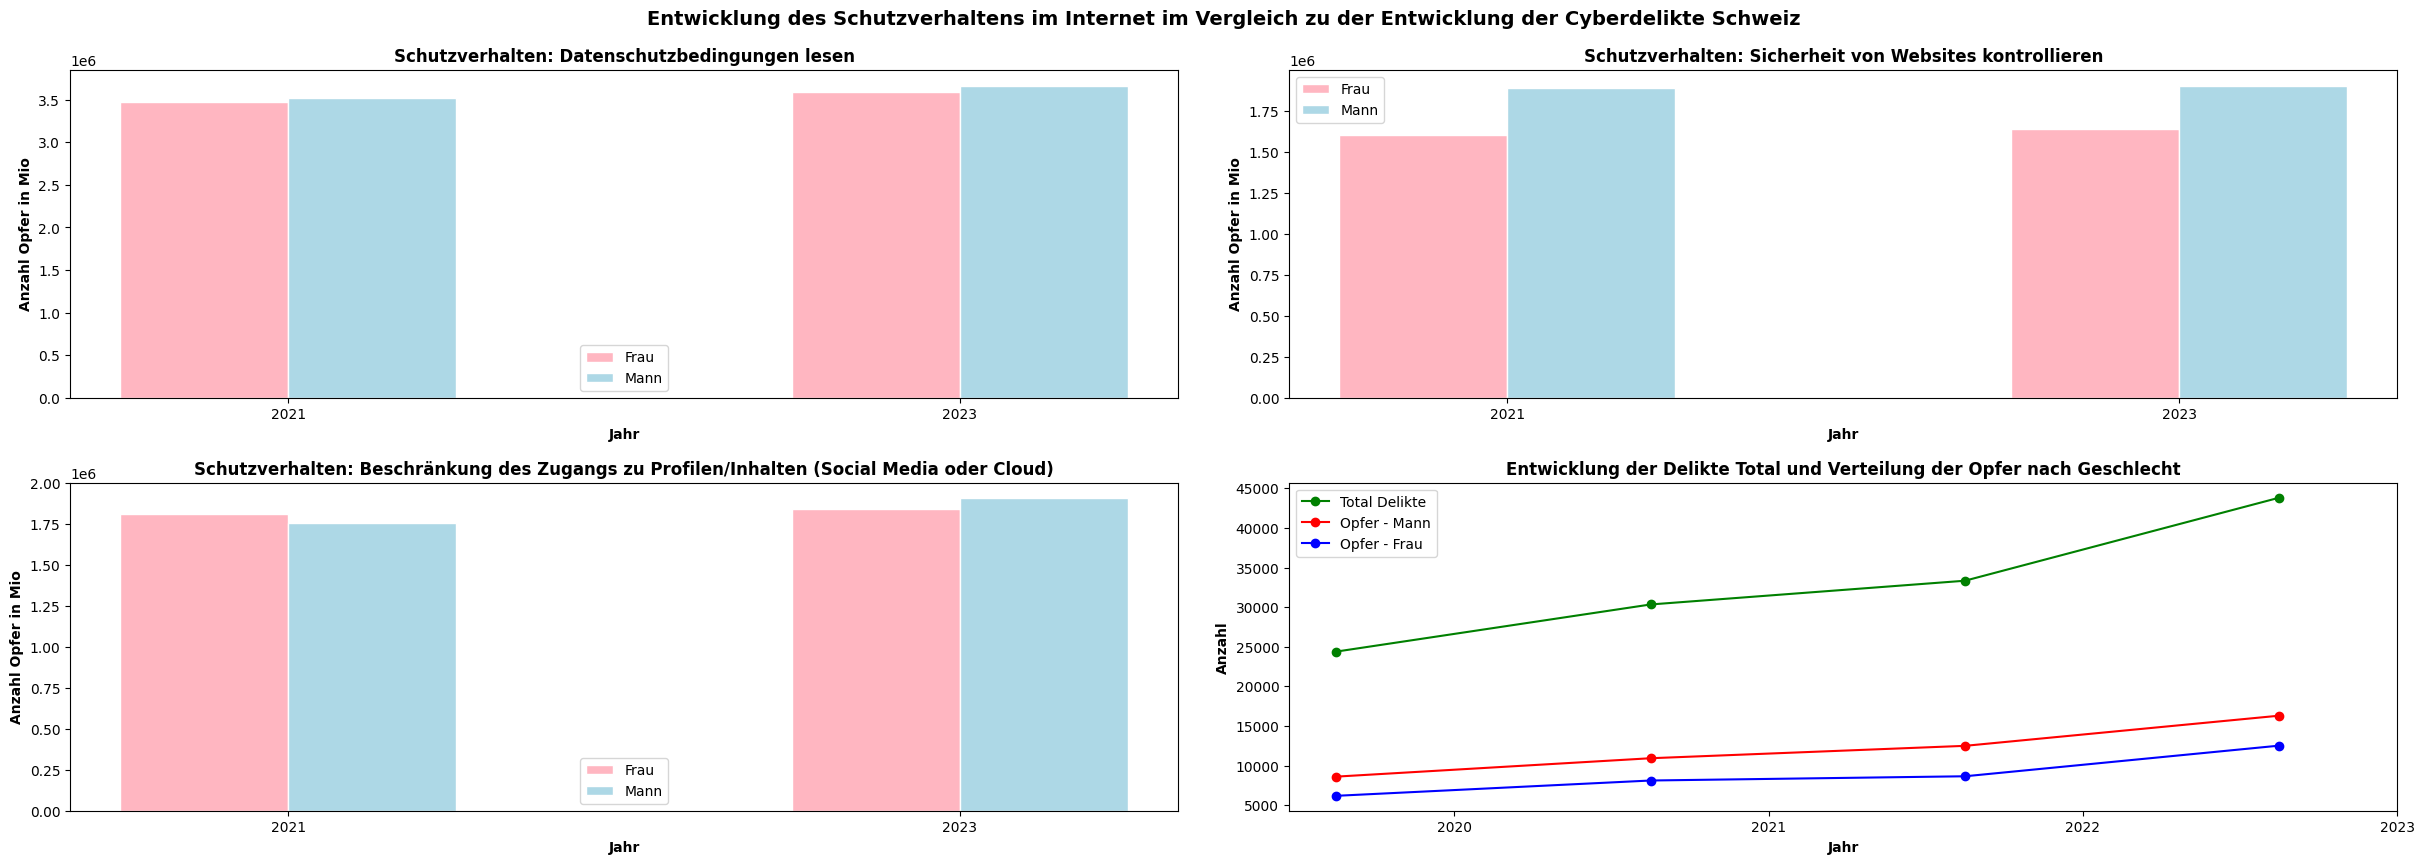

In [115]:
# Dual plot of two dependent values

# set width of bars
barWidth = 0.25
fig, ax = plt.subplots(2, 2, figsize=(24,8))
fig.tight_layout(h_pad=4)

# labels plot1
labels_plot1 = ['2021', '2023']


# Set position of bar on X axis
br1 = [0.25,1.25]
br2 = [0.5, 1.5]

## Plot about the development of reading the privacy policy
# Make the bar plot1
ax[0][0].bar(br1, verhalten_schutz[0], color='lightpink', width=barWidth, edgecolor='white', label='Frau')
ax[0][0].bar(br2, verhalten_schutz[1], color='lightblue', width=barWidth, edgecolor='white', label='Mann')


# Add xticks on the middle of the group bars plot1
ax[0][0].set_title('Schutzverhalten: Datenschutzbedingungen lesen', fontweight='bold')
ax[0][0].set_xlabel('Jahr', fontweight='bold')
ax[0][0].set_ylabel('Anzahl Opfer in Mio', fontweight='bold')
ax[0][0].set_xticks([r + barWidth + 0.125 for r in range(len(verhalten_schutz[0]))])
ax[0][0].set_xticklabels(labels_plot1)
ax[0][0].legend()

## Plot about the development of checking website security
# Make the bar plot2
ax[0][1].bar(br1, verhalten_schutz[2], color='lightpink', width=barWidth, edgecolor='white', label='Frau')
ax[0][1].bar(br2, verhalten_schutz[3], color='lightblue', width=barWidth, edgecolor='white', label='Mann')


# Add xticks on the middle of the group bars plot2
ax[0][1].set_title('Schutzverhalten: Sicherheit von Websites kontrollieren', fontweight='bold')
ax[0][1].set_xlabel('Jahr', fontweight='bold')
ax[0][1].set_ylabel('Anzahl Opfer in Mio', fontweight='bold')
ax[0][1].set_xticks([r + barWidth + 0.125 for r in range(len(verhalten_schutz[0]))])
ax[0][1].set_xticklabels(labels_plot1)
ax[0][1].legend()

## Plot about the development of restricting access to profiles/content
# Make the bar plot3
ax[1][0].bar(br1, verhalten_schutz[4], color='lightpink', width=barWidth, edgecolor='white', label='Frau')
ax[1][0].bar(br2, verhalten_schutz[5], color='lightblue', width=barWidth, edgecolor='white', label='Mann')


# Add xticks on the middle of the group bars plot3
ax[1][0].set_title('Schutzverhalten: Beschränkung des Zugangs zu Profilen/Inhalten (Social Media oder Cloud)', fontweight='bold')
ax[1][0].set_xlabel('Jahr', fontweight='bold')
ax[1][0].set_ylabel('Anzahl Opfer in Mio', fontweight='bold')
ax[1][0].set_xticks([r + barWidth + 0.125 for r in range(len(verhalten_schutz[0]))])
ax[1][0].set_xticklabels(labels_plot1)
ax[1][0].legend()

## Plot about the development of total delicts and the distribution of victims by gender
# labels plot1
labels_plot4 = ['2020','2021','2022','2023']

# Make the bar plot4
ax[1][1].plot(delikt_rows[0][0], color='green', label='Total Delikte', marker='o')
ax[1][1].plot(delikt_rows[0][1], color='red', label='Opfer - Mann', marker='o')
ax[1][1].plot(delikt_rows[0][2], color='blue', label='Opfer - Frau', marker='o')

# Add xticks on the middle of the group bars plot4
ax[1][1].set_title('Entwicklung der Delikte Total und Verteilung der Opfer nach Geschlecht', fontweight='bold')
ax[1][1].set_xlabel('Jahr', fontweight='bold')
ax[1][1].set_ylabel('Anzahl', fontweight='bold')
ax[1][1].set_xticks([r + barWidth + 0.125 for r in range(len(delikt_rows[0][0]))])
ax[1][1].set_xticklabels(labels_plot4)
ax[1][1].legend()

# Create legend & Show graphic
fig.suptitle('Entwicklung des Schutzverhaltens im Internet im Vergleich zu der Entwicklung der Cyberdelikte Schweiz', fontweight='bold', fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.1)
plt.show()

#### Entwicklung des Schutzverhaltens im Internet im Vergleich zu der Entwicklung der Cyberdelikte in der Schweiz (2021 versus 2023)

In den Bereichen "Datenschutzbestimmungen lesen" und "Beschränkung des Zugangs zu Profilen/Inhalten (Social Media oder Cloud)" verhalten sich beide Geschlechter ähnlich. Dabei ist kein markanter Unterschied im Schutzverhalten zwischen den Jahren 2021 und 2023 zu erkennen. Beim Schutzverhalten "Sicherheit von Websites kontrollieren" ist ein Unterschied der Geschlechter zu erkennen. So scheint es, als ob das weibliche Geschlecht weniger auf schädliche Websites ist reinfällt als das männliche. Dieser Unterschied widerspiegelt sich in den Jahren 2021 wie auch 2023.

Die Entwicklung der Opferzahlen nach Geschlecht verläuft quasi parallel. Dabei ist eine Zunahme der Opferzahlen seit 2020 zu vernehmen. Von den verschiedenen Delikten sind stets mehr männliche als weibliche Benutzer betroffen. Die Zunahme der Opferzahlen verläuft jedoch weitestgehend parallel und lässt keine Ausreisser erkennen.  
